# Lead Scoring

__Assignment Submitted by:__ Janarthanan Balasubramanian and Siva Prakash

__Client:__ X Education (selling online courses to industry professionals)

X Education markets its courses on several websites and search engines like Google. The prospects who see these advertisements and land on the website might browse the courses or watch some videos or fill up a form for the course (at this point they are classified as a lead). The company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted.

__Problem Statement:__ Lead conversion rate is very poor (30%) i.e. out of 100 leads only 30 are converted.

__Objective:__ To make the process efficient so that the lead conversion rate goes up. 

__Strategy:__ Communicate with potential leads rather than making calls to everyone.

__Requirement:__ Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the employees to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
import numpy as np
import pandas as pd

import warnings, os
import random as rd

In [2]:
%%html
<style> table {float:left} </style>

In [3]:
warnings.filterwarnings('ignore')

data_path = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---

## 1. Reading and Understanding the Data

In [4]:
leads = pd.read_csv(data_path + '\\Leads.csv', encoding = "ISO-8859-1")

In [5]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', leads.shape[0])
print('Number of cols: ', leads.shape[1])

Number of rows:  9240
Number of cols:  37


In [7]:
## check all the variables in the data set

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

There are __37 columns__ and __9240 rows__ in the data set provided. 

<font color = 'blue'> __The column names are too long. For ease of coding, we will rename these fields with shorter names.__ </font>

In [8]:
leads.rename(columns = {'How did you hear about X Education' : 'Channel',
                        'What is your current occupation' : 'Occupation',
                        'What matters most to you in choosing a course' : 'Motto',
                        'TotalVisits' : 'Total Visits',
                        'Total Time Spent on Website': 'Time Spent',
                        'Page Views Per Visit': 'Page Views',
                        'I agree to pay the amount through cheque' : 'Pay Cheque',
                        'A free copy of Mastering The Interview' : 'Free Book',
                        'X Education Forums' : 'Forums',
                        'Newspaper Article' : 'Article',
                        'Digital Advertisement' : 'Digital Ads',
                        'Through Recommendations' : 'Recommendations', 
                        'Receive More Updates About Our Courses' : 'Course Updates', 
                        'Update me on Supply Chain Content' : 'SC Updates', 
                        'Get updates on DM Content' : 'DM Updates',
                        'Asymmetrique Activity Index' : 'Activity Index', 
                        'Asymmetrique Profile Index' : 'Profile Index', 
                        'Asymmetrique Activity Score' : 'Activity Score', 
                        'Asymmetrique Profile Score' : 'Profile Score'}, inplace = True)

In [9]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Total Visits', 'Time Spent', 'Page Views', 'Last Activity', 'Country', 'Specialization', 'Channel', 'Occupation', 'Motto', 'Search', 'Magazine', 'Article', 'Forums', 'Newspaper', 'Digital Ads', 'Recommendations', 'Course Updates', 'Tags', 'Lead Quality', 'SC Updates', 'DM Updates', 'Lead Profile', 'City', 'Activity Index', 'Profile Index', 'Activity Score', 'Profile Score', 'Pay Cheque', 'Free Book', 'Last Notable Activity'], dtype='object')

<font color = 'blue'> __For each column we will explore the data type, null values, and unique values.__ </font> 

In [10]:
stats = pd.concat([pd.DataFrame(leads.dtypes), 
                   pd.DataFrame(leads.nunique()), 
                   pd.DataFrame(leads.isnull().sum()),
                   pd.DataFrame(round(100 * (leads.isnull().sum() / len(leads.index)), 2))], axis = 1).reset_index()

stats.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [11]:
stats

,Variable,Data Type,Unique Values,Null Values,Null Percentage
0,Prospect ID,object,9240,0,0.00
1,Lead Number,int64,9240,0,0.00
2,Lead Origin,object,5,0,0.00
3,Lead Source,object,21,36,0.39
4,Do Not Email,object,2,0,0.00
5,Do Not Call,object,2,0,0.00
6,Converted,int64,2,0,0.00
7,Total Visits,float64,41,137,1.48
8,Time Spent,int64,1731,0,0.00
9,Page Views,float64,114,137,1.48


### Data Dictionary

|Variables|Description|Renamed To|Type|Null Values|Levels|
|:---|:---|:---|:---|---:|---:|
|Prospect ID|A unique ID with which the customer is identified.|Prospect ID|ID|0|9240|
|Lead Number|A lead number assigned to each lead procured.|Lead Number|Categorical|0|9240|
|Lead Origin|Origin with which the customer was identified to be a lead.|Lead Origin|Categorical|0|5|
|Lead Source|The source of the lead.|Lead Source|Categorical|36|21|
|Do Not Email|Whether the customer want to be emailed about the course or not.|Do Not Email|Binary|0|2|
|Do Not Call|Whether the customer want to be called about the course or not.|Do Not Call|Binary|0|2|
|Converted|The target variable. Whether the lead is successfully converted or not.|Converted|Binary|0|2|
|TotalVisits|The total number of visits made by the customer on the website.|Total Visits|Numeric|137||
|Total Time Spent on Website|The total time spent by the customer on the website.|Time Spent|Numeric|1731||
|Page Views Per Visit|Average number of pages on the website viewed during the visits.|Page Views|Numeric|137||
|Last Activity|Last activity performed by the customer.|Last Activity|Categorical|103|17|
|Country|The country of the customer.|Country|Categorical|2461|38|
|Specialization|The industry domain in which the customer worked before.|Specialization|Categorical|1438|19|
|How did you hear about X Education|The source from which the customer heard about X Education.|Channel|Categorical|2207|10|
|What is your current occupation|Current occupation of the customer.|Occupation|Categorical|2690|6|
|What matters most to you in choosing a course|What is the main motto behind doing the course.|Motto|Categorical|2709|3|
|Search|Whether the customer had seen Search Ads.|Search|Binary|0|2|
|Magazine|Whether the customer had seen Magazine Ads.|Magazine|Binary|0|1|
|Newspaper Article|Whether the customer had seen any Newspaper Articles.|Article|Binary|0|2|
|X Education Forums|Whether the customer had visited X Education Forums.|Forums|Binary|0|2|
|Newspaper|Whether the customer had seen Newspaper Ads.|Newspaper|Binary|0|2|
|Digital Advertisement|Whether the customer had seen Digital Ads.|Digital Ads|Binary|0|2|
|Through Recommendations|Whether the customer had been recommended.|Recommendations|Binary|0|2|
|Receive More Updates About Our Courses|Customer choice to receive more updates about the courses.|Course Updates|Binary|0|1|
|Tags|Tags assigned to customers indicating the current status of the lead.|Tags|Categorical|3353|26|
|Lead Quality|Based on the data and intuition of the employee assigned to the lead.|Lead Quality|Categorical|4767|5|
|Update me on Supply Chain Content|Customer choice to receive supply chain content updates.|SC Updates|Categorical|0|1|
|Get updates on DM Content|Customer choice to receive DMontent updates.|DM Updates|Categorical|0|1|
|Lead Profile|A lead level assigned to each customer based on their profile.|Lead Profile|Categorical|2709|6|
|City|The city of the customer.|City|Categorical|1420|7|
|Asymmetrique Activity Index|Activity Index assigned based on customer activity.|Activity Index|Categorical|4218|3|
|Asymmetrique Profile Index|Profile Index assigned based on customer  profile.|Profile Index|Categorical|4218|3|
|Asymmetrique Activity Score|Activity Score assigned based on customer activity.|Activity Score|Categorical|4218|12|
|Asymmetrique Profile Score|Profile Score assigned based on customer profile.|Profile Score|Categorical|4218|10|
|I agree to pay the amount through cheque|Whether the customer has agreed to pay through cheque.|Pay Cheque|Binary|0|1|
|A free copy of Mastering The Interview|Whether the customer wants a free copy of the book.|Free Book|Binary|0|2|
|Last Notable Activity|The last notable acitivity performed by the student.|Last Notable Activity|Categorical|0|16|

The next step is to get more insights from the data through visualization. 

---

## 2. Data Visualization

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib import colors as mcolors

In [13]:
plt.rcParams.update(plt.rcParamsDefault)

In [14]:
%matplotlib inline

### 2.1. Target Variable

The target variable __Converted__ indicates whether the lead is converted or not.

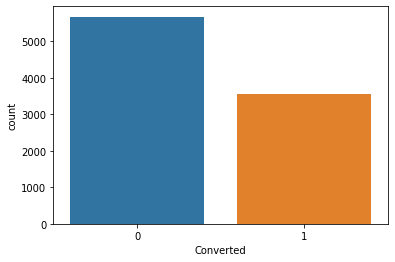

In [15]:
sns.countplot(data = leads, x = 'Converted')

In [16]:
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

### 2.2. Visualizing the Categorical Variables

In [17]:
catvar  = ['Lead Origin', 'Lead Source', 'Lead Quality', 'Lead Profile',
           'Country', 'City', 'Specialization', 'Channel', 'Occupation', 'Motto',
           'Activity Index', 'Profile Index', 'Last Activity', 'Last Notable Activity']


Variable       : Lead Origin
Null Values    : None
Levels         : 5

['Landing Page Submission (4886)', 'API (3580)', 'Lead Add Form (718)', 'Lead Import (55)', 'Quick Add Form (1)']

********************************************************************************



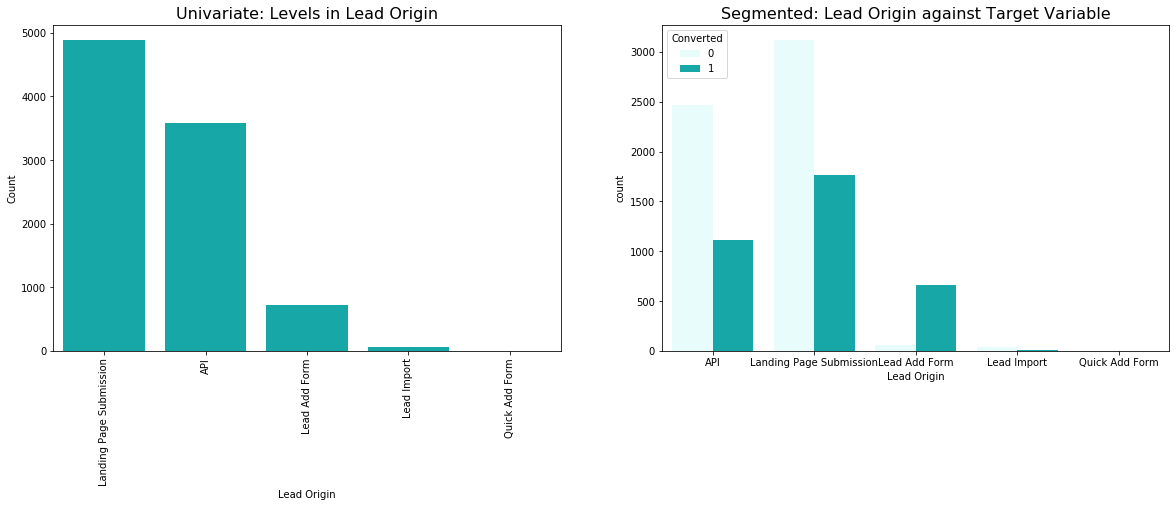

********************************************************************************


Variable       : Lead Source
Null Values    : 36 - 0.39 %
Levels         : 21

['Google (2868)', 'Direct Traffic (2543)', 'Olark Chat (1755)', 'Organic Search (1154)', 'Reference (534)', 'Welingak Website (142)', 'Referral Sites (125)', 'Facebook (55)', 'bing (6)', 'google (5)', 'Click2call (4)', 'Social Media (2)', 'Live Chat (2)', 'Press_Release (2)', 'testone (1)', 'WeLearn (1)', 'welearnblog_Home (1)', 'Pay per Click Ads (1)', 'youtubechannel (1)', 'blog (1)', 'NC_EDM (1)']

********************************************************************************



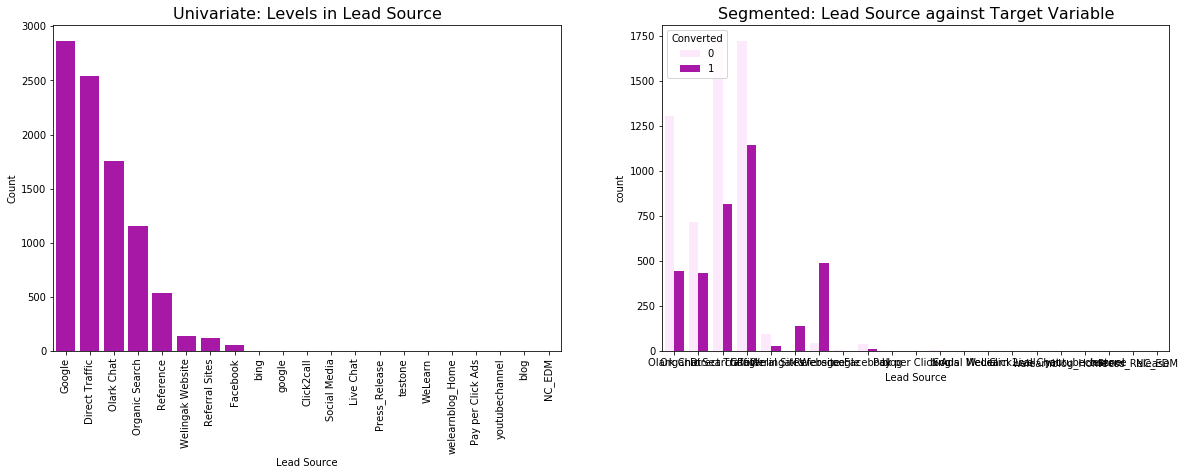

********************************************************************************


Variable       : Lead Quality
Null Values    : 4767 - 51.59 %
Levels         : 5

['Might be (1560)', 'Not Sure (1092)', 'High in Relevance (637)', 'Worst (601)', 'Low in Relevance (583)']

********************************************************************************



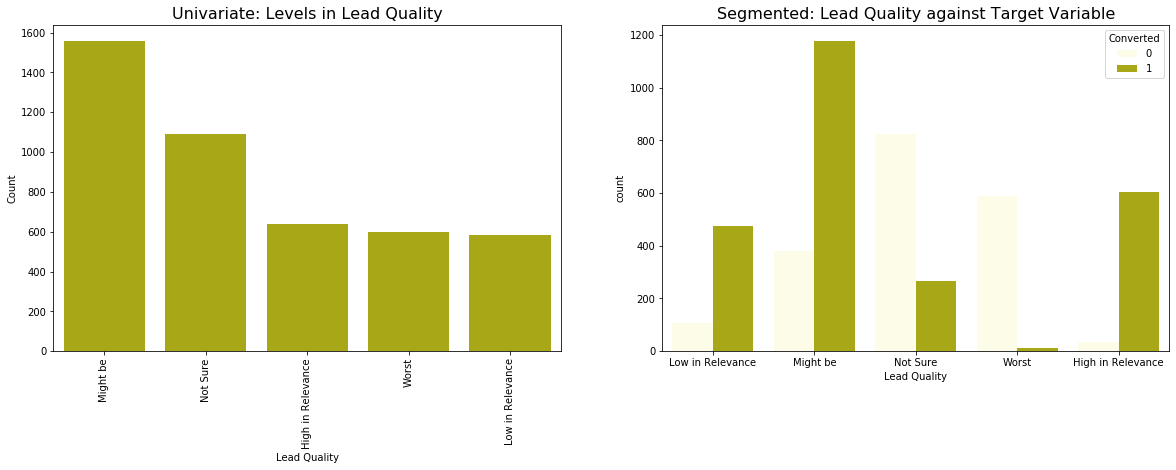

********************************************************************************


Variable       : Lead Profile
Null Values    : 2709 - 29.32 %
Levels         : 6

['Select (4146)', 'Potential Lead (1613)', 'Other Leads (487)', 'Student of SomeSchool (241)', 'Lateral Student (24)', 'Dual Specialization Student (20)']

********************************************************************************



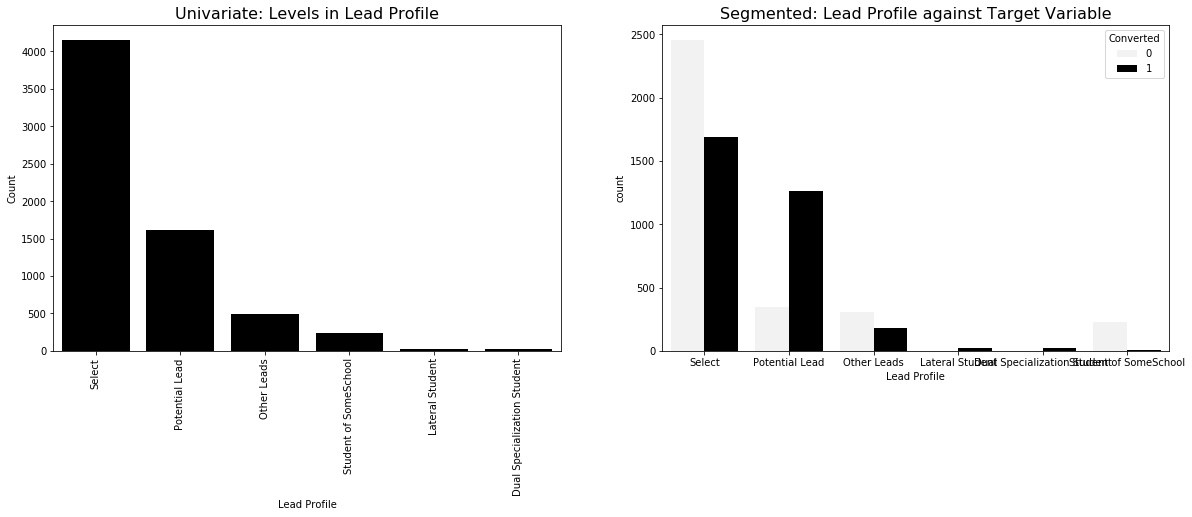

********************************************************************************


Variable       : Country
Null Values    : 2461 - 26.63 %
Levels         : 38

['India (6492)', 'United States (69)', 'United Arab Emirates (53)', 'Singapore (24)', 'Saudi Arabia (21)', 'United Kingdom (15)', 'Australia (13)', 'Qatar (10)', 'Bahrain (7)', 'Hong Kong (7)', 'France (6)', 'Oman (6)', 'unknown (5)', 'South Africa (4)', 'Kuwait (4)', 'Nigeria (4)', 'Germany (4)', 'Canada (4)', 'Sweden (3)', 'Netherlands (2)', 'China (2)', 'Asia/Pacific Region (2)', 'Uganda (2)', 'Belgium (2)', 'Bangladesh (2)', 'Philippines (2)', 'Italy (2)', 'Ghana (2)', 'Indonesia (1)', 'Vietnam (1)', 'Malaysia (1)', 'Liberia (1)', 'Russia (1)', 'Tanzania (1)', 'Sri Lanka (1)', 'Denmark (1)', 'Kenya (1)', 'Switzerland (1)']

********************************************************************************



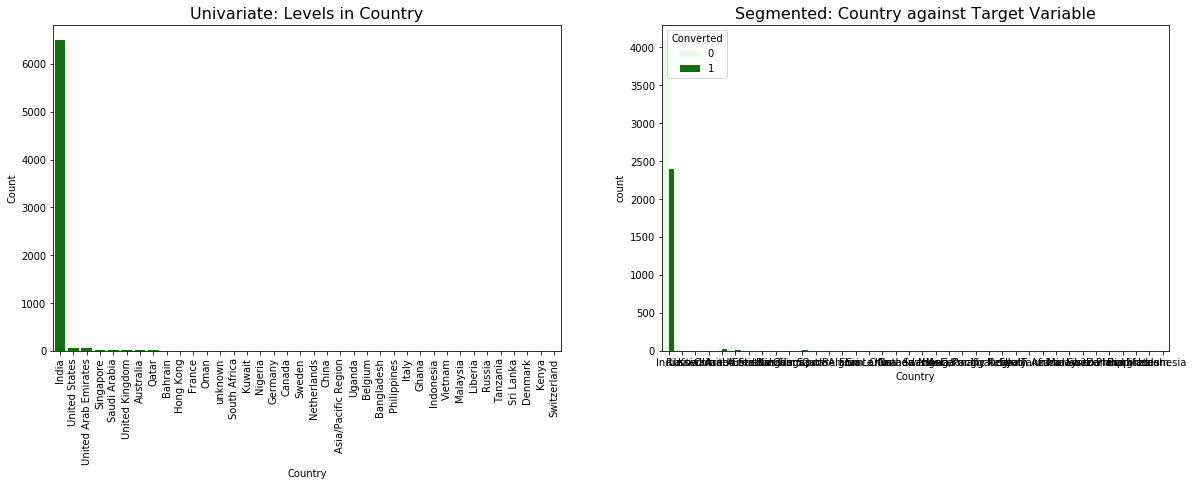

********************************************************************************


Variable       : City
Null Values    : 1420 - 15.37 %
Levels         : 7

['Mumbai (3222)', 'Select (2249)', 'Thane & Outskirts (752)', 'Other Cities (686)', 'Other Cities of Maharashtra (457)', 'Other Metro Cities (380)', 'Tier II Cities (74)']

********************************************************************************



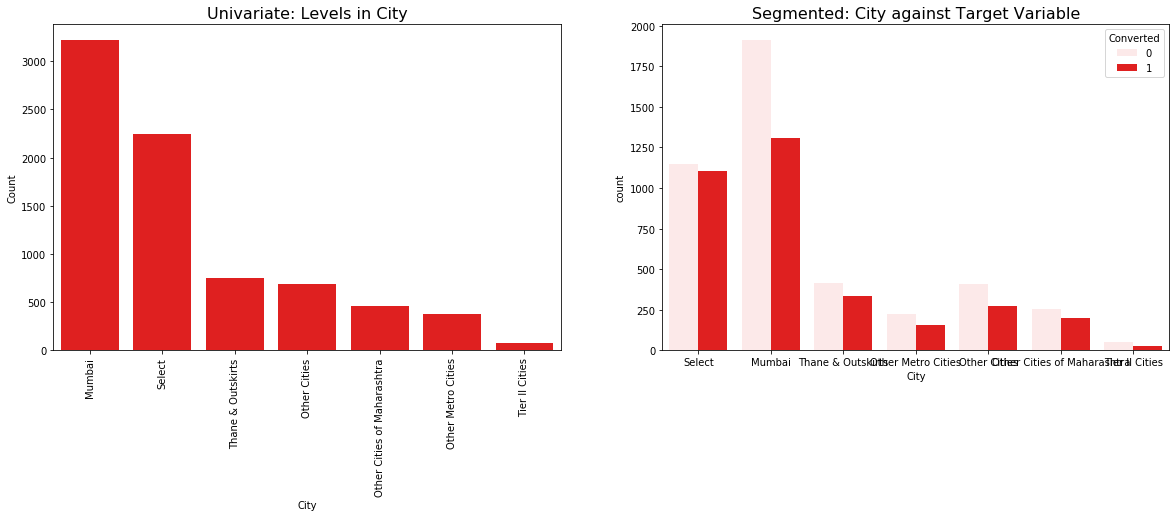

********************************************************************************


Variable       : Specialization
Null Values    : 1438 - 15.56 %
Levels         : 19

['Select (1942)', 'Finance Management (976)', 'Human Resource Management (848)', 'Marketing Management (838)', 'Operations Management (503)', 'Business Administration (403)', 'IT Projects Management (366)', 'Supply Chain Management (349)', 'Banking, Investment And Insurance (338)', 'Travel and Tourism (203)', 'Media and Advertising (203)', 'International Business (178)', 'Healthcare Management (159)', 'Hospitality Management (114)', 'E-COMMERCE (112)', 'Retail Management (100)', 'Rural and Agribusiness (73)', 'E-Business (57)', 'Services Excellence (40)']

********************************************************************************



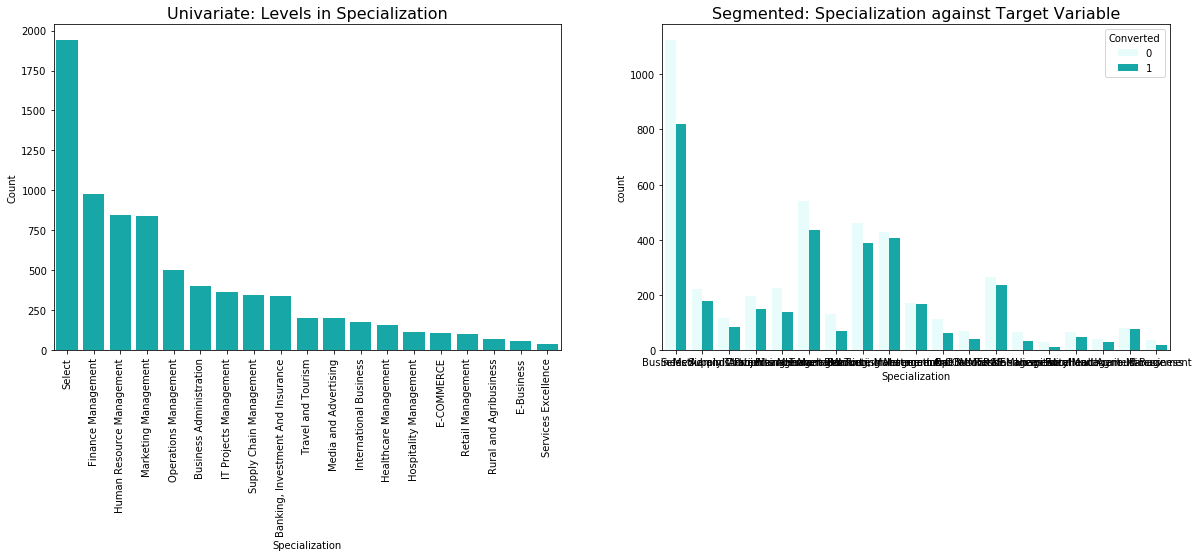

********************************************************************************


Variable       : Channel
Null Values    : 2207 - 23.89 %
Levels         : 10

['Select (5043)', 'Online Search (808)', 'Word Of Mouth (348)', 'Student of SomeSchool (310)', 'Other (186)', 'Multiple Sources (152)', 'Advertisements (70)', 'Social Media (67)', 'Email (26)', 'SMS (23)']

********************************************************************************



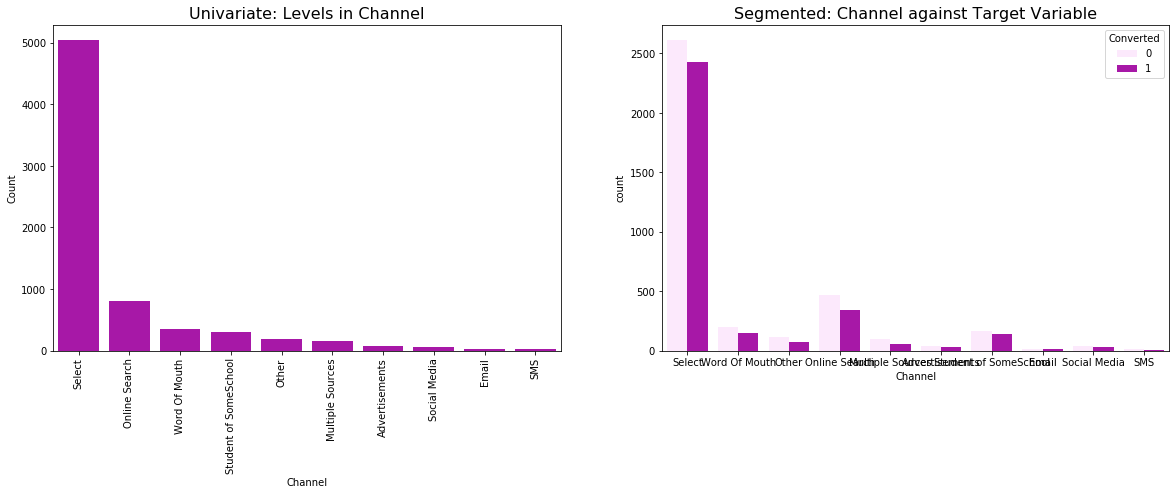

********************************************************************************


Variable       : Occupation
Null Values    : 2690 - 29.11 %
Levels         : 6

['Unemployed (5600)', 'Working Professional (706)', 'Student (210)', 'Other (16)', 'Housewife (10)', 'Businessman (8)']

********************************************************************************



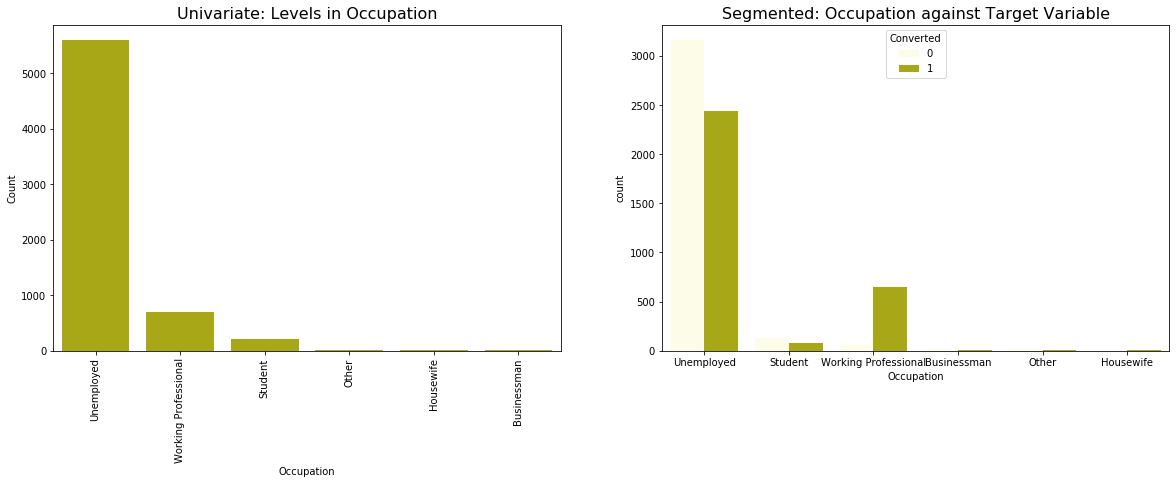

********************************************************************************


Variable       : Motto
Null Values    : 2709 - 29.32 %
Levels         : 3

['Better Career Prospects (6528)', 'Flexibility & Convenience (2)', 'Other (1)']

********************************************************************************



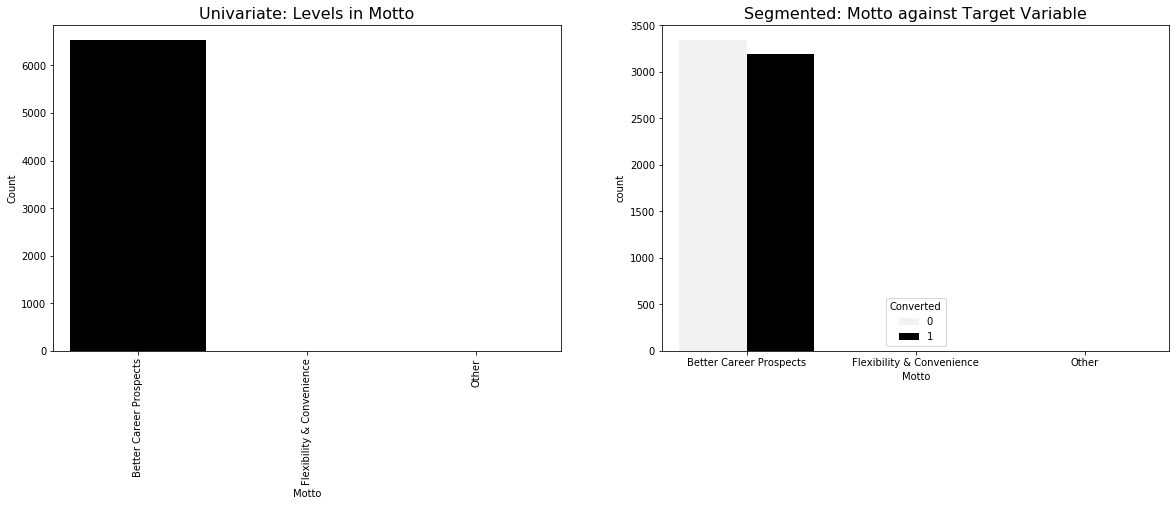

********************************************************************************


Variable       : Activity Index
Null Values    : 4218 - 45.65 %
Levels         : 3

['02.Medium (3839)', '01.High (821)', '03.Low (362)']

********************************************************************************



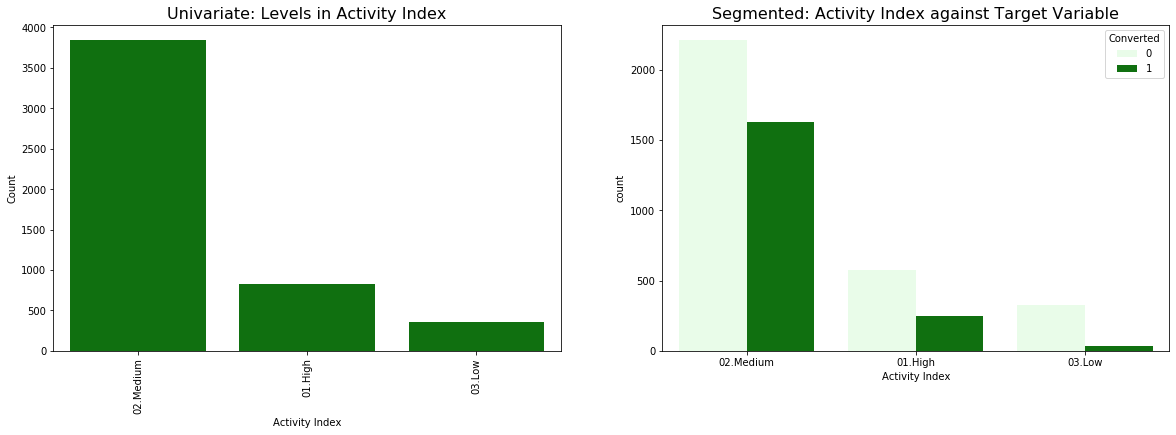

********************************************************************************


Variable       : Profile Index
Null Values    : 4218 - 45.65 %
Levels         : 3

['02.Medium (2788)', '01.High (2203)', '03.Low (31)']

********************************************************************************



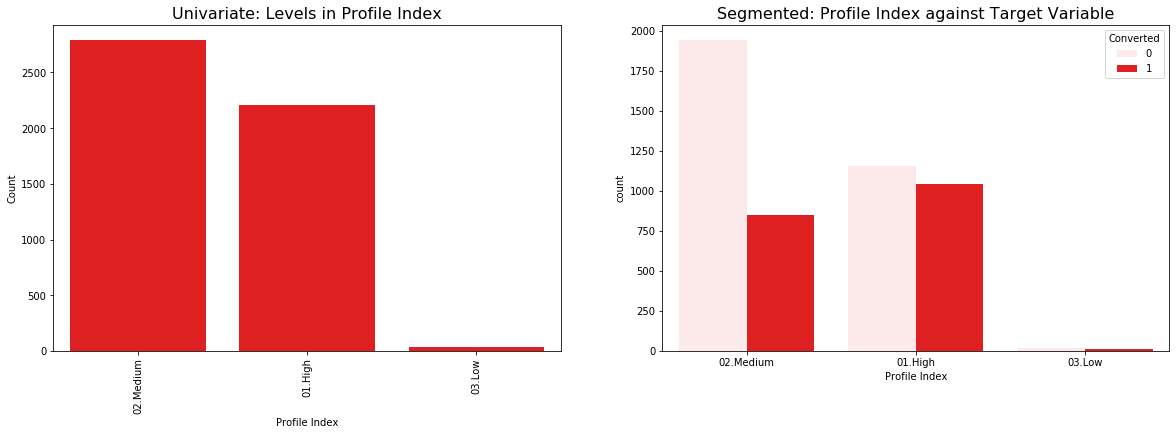

********************************************************************************


Variable       : Last Activity
Null Values    : 103 - 1.11 %
Levels         : 17

['Email Opened (3437)', 'SMS Sent (2745)', 'Olark Chat Conversation (973)', 'Page Visited on Website (640)', 'Converted to Lead (428)', 'Email Bounced (326)', 'Email Link Clicked (267)', 'Form Submitted on Website (116)', 'Unreachable (93)', 'Unsubscribed (61)', 'Had a Phone Conversation (30)', 'Approached upfront (9)', 'View in browser link Clicked (6)', 'Email Marked Spam (2)', 'Email Received (2)', 'Resubscribed to emails (1)', 'Visited Booth in Tradeshow (1)']

********************************************************************************



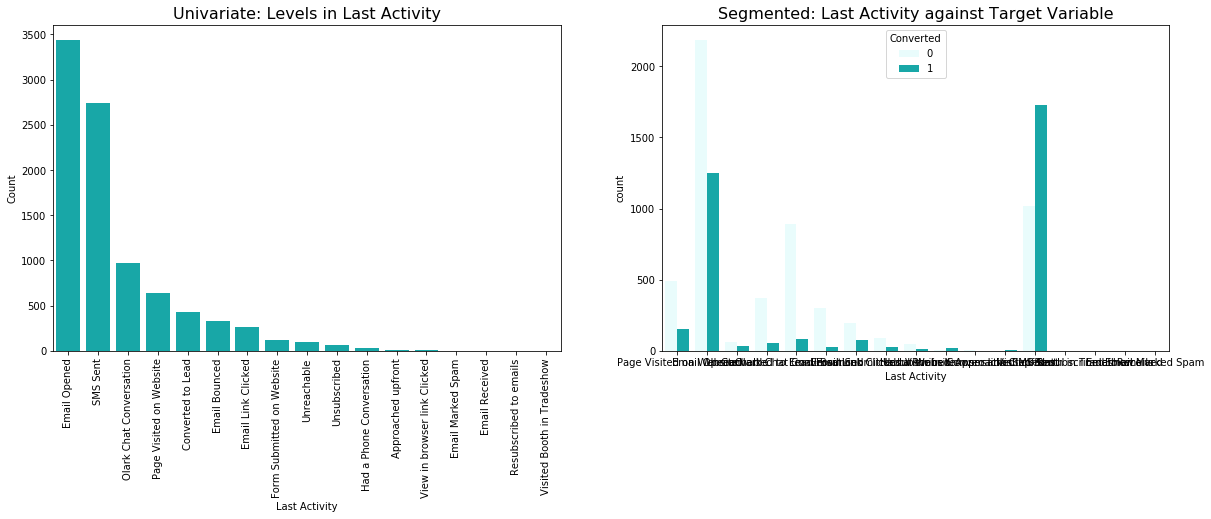

********************************************************************************


Variable       : Last Notable Activity
Null Values    : None
Levels         : 16

['Modified (3407)', 'Email Opened (2827)', 'SMS Sent (2172)', 'Page Visited on Website (318)', 'Olark Chat Conversation (183)', 'Email Link Clicked (173)', 'Email Bounced (60)', 'Unsubscribed (47)', 'Unreachable (32)', 'Had a Phone Conversation (14)', 'Email Marked Spam (2)', 'Email Received (1)', 'View in browser link Clicked (1)', 'Approached upfront (1)', 'Form Submitted on Website (1)', 'Resubscribed to emails (1)']

********************************************************************************



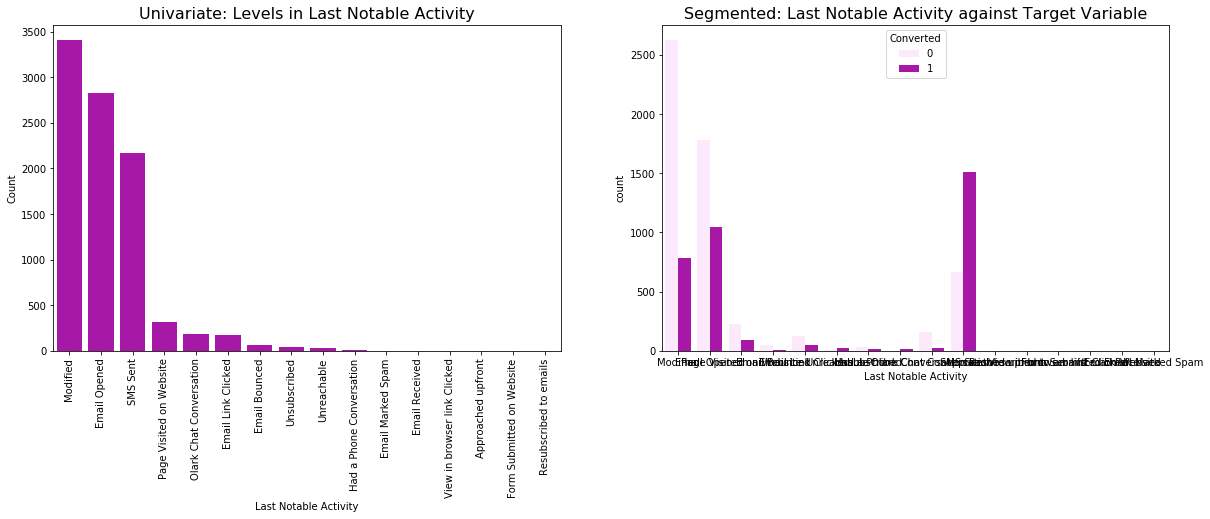

********************************************************************************



In [18]:
# Plotting the categorical variables

colors = ['c', 'm', 'y', 'k', 'g', 'r']; i = 0

for col in catvar:
    
    print(); print('Variable       : ' + col)
    
    # Printing the Statistics
       
    nullval = leads[col].isnull().sum()
    percent = round((nullval / len(leads.index)) * 100, 2)
    if nullval != 0: print('Null Values    :', nullval, '-', percent, '%')
    else: print('Null Values    : None')
    
    tempdf = pd.DataFrame(leads[col].value_counts()).reset_index()
    tempdf.rename(columns = { 'index' : col, col : 'Count'}, inplace = True)
    tempdf['Percentage'] = round((tempdf['Count'] / len(leads.index) * 100), 2)
    
    levels = list(tempdf[col] + ' (' + tempdf['Count'].astype('str') + ')'); 
    print('Levels         :', len(levels))
    print(); print(levels)
    
    print(); print('*' * 80); print()
       
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        
    # Visualization - Univariate
    
    ax = sns.barplot(data = tempdf, x = col, y = 'Count', color = colors[i % 6], ax = axes[0])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.set_title('Univariate: Levels in ' + col, fontsize = 16)
    
    # Visualization - Bivariate (against the Target)
    
    ax = sns.countplot(data = leads, x = col, hue = 'Converted', ax = axes[1], color = colors[i % 6])
    ax.set_title('Segmented: ' + col + ' against Target Variable', fontsize = 16)
    
    plt.show()
    
    print('*' * 80); print()
    
    i = i + 1

#### Insights from the Visualization of Categorical Variables

<font color = 'blue'> __There is a level with value 'Select' in some of the variables:__ </font>

  - Channel (How did you hear about X Education): 5043 records
  - Specialization: 1942 records
  - City: 2249 records
  - Lead Profile: 4146 records

Similarly in __Last Notable Activity__, there is a level with value 'Modified', which does not give much information about what is modified. These are as good as null or missing values.

<font color = 'blue'> __There are features where more than 50% of the values are missing.__ </font>

<font color = 'blue'> __Some of the variables are skewed.__ </font> For example, in Country, most of the records belong to customers in India, with an insignificant percentage from other countries. In City, most of the customers are from Mumbai (3222), 1420 null values and 2249 records with value 'Select' which is approximately 75% (6891 records). Motto (What matters most to you in choosing a course): Most of them have selected Better Career Prospects (6528). And the remaining values are blank (except for 3 records). These variables need to be properly treated while building the model. 

---

### 2.3. Visualizing the Binary Variables (Categorical Variables with 2 Levels)

In [19]:
binvar = ['Do Not Email', 'Do Not Call', 'Pay Cheque', 'Free Book',
          'Search', 'Magazine', 'Article', 'Forums', 'Newspaper', 'Digital Ads', 'Recommendations', 
          'Course Updates', 'SC Updates', 'DM Updates']

In [20]:
# preparing a data set with the levels and value counts for binary variables

levels = pd.DataFrame(columns = ['Value', 'Count', 'Variable'])

for column in binvar: 
    temp = leads[column].value_counts().reset_index()
    temp.rename(columns = {'index' : 'Value', column : 'Count'}, inplace = True)
    temp['Variable'] = column
    levels = levels.append(temp)
    
levels = levels[['Variable', 'Value', 'Count']]

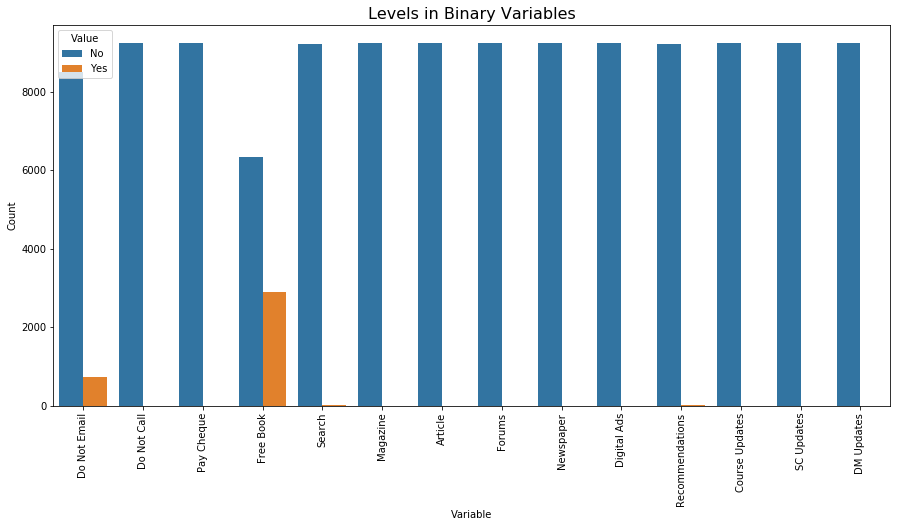

In [21]:
# plotting the binary variables

plt.figure(figsize=(15,7))
ax = sns.barplot(data = levels, x = 'Variable', y = 'Count', hue = 'Value')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Levels in Binary Variables', fontsize = 16)
plt.show()

#### Insights from the Visualization of Binary Variables

 - __Do Not Email:__ 734 candidates has selected Yes and 8506 has selected No. 92% have opted for receiving the emails. 
 - __Free Book:__ 6352 opted out and 2888 opted in. 68:32 is the ratio. 

In all the other fields the number of records with Yes is almost Nil. Since there is no variability, these columns are not going to contribute to our model. 

<font color = 'blue'>__The columns other than Do Not Email and Free Book can be dropped.__ </font> 

---

### 2.4. Numeric Variables

In [22]:
numvar  = ['Time Spent', 'Total Visits', 'Page Views', 'Activity Score', 'Profile Score']

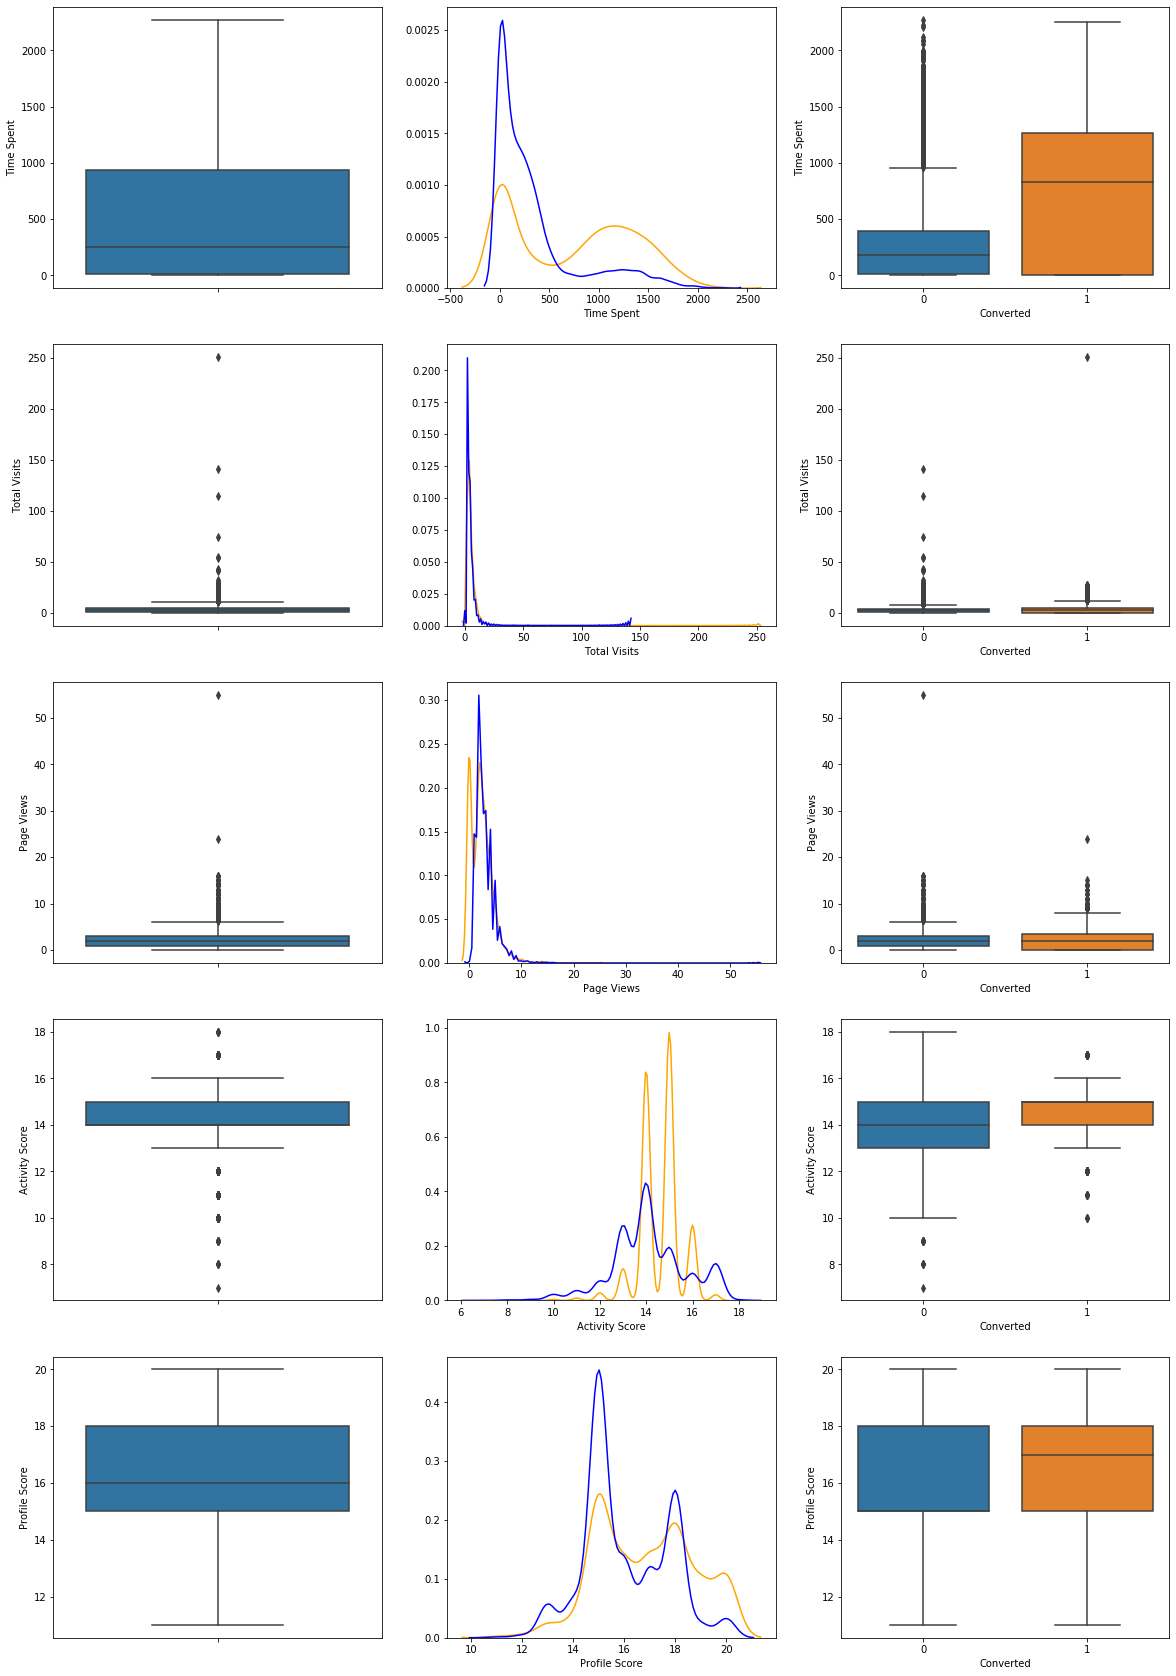

In [23]:
# box plot and dist plot for numeric variables

fig, axes = plt.subplots(5, 3, figsize=(20, 30))

i = 0

for column in numvar:
    
    sns.boxplot(data = leads, y = column, ax = axes[i][0])
            
    sns.boxplot(data = leads, x = 'Converted', y = column, ax = axes[i][2])
    
    values = leads[leads['Converted'] == 1][column]
    sns.distplot(values, hist = False, ax = axes[i][1], color = 'orange')
    
    values = leads[leads['Converted'] == 0][column]
    sns.distplot(values, hist = False, ax = axes[i][1], color = 'blue')
    
    i = i + 1
    
plt.show()

__We can see that the time spent in the website is one of the strong predictors of the conversion.__ 

Let us see whether there is any correlation between these variables.

In [24]:
correlation = leads[['Time Spent', 'Total Visits', 'Page Views', 'Activity Score', 'Profile Score', 'Converted']].corr()

(6.0, 0.0)

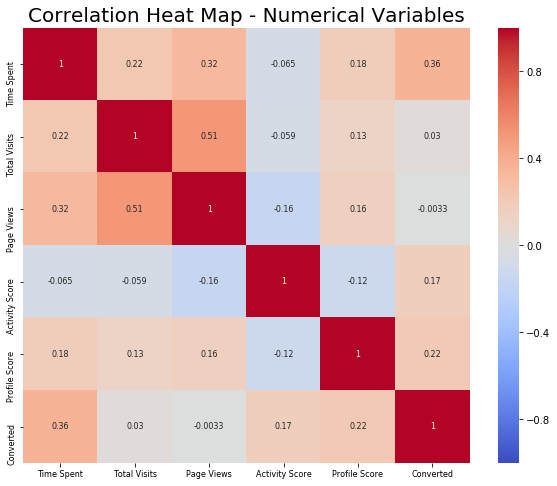

In [25]:
# plot correlation heat map for numeric variables

f, ax = plt.subplots(figsize=(10, 8))

heatmap = sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, annot_kws = {"size": 8})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 8)

# add title to the plot
ax.set_title('Correlation Heat Map - Numerical Variables', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

__We do not see any strong correlation between the variables.__

---

## 3. Data Cleanup

Based on the insights from the visualization, we need address the following data quality issues:

 - Missing Values in Categorical Variables, marked as Select (as good as null value)
 - Treat the null values by a) drop the row or column with null value or b) replace missing value with another value
 - Drop the columns that are skewed or heavily imbalanced or with no variance

### 3.1. Missing Values - Marked as Select

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. Let us check which of the fields are having the 'Select' level.

In [26]:
# Check which variables have the level Select

levels = pd.DataFrame(columns = ['Value', 'Count', 'Variable'])

for column in catvar: 
    temp = leads[column].value_counts().reset_index()
    temp.rename(columns = {'index' : 'Value', column : 'Count'}, inplace = True)
    temp['Variable'] = column
    levels = levels.append(temp)
    
levels = levels[['Variable', 'Value', 'Count']]

In [27]:
levels[levels['Value'] == 'Select']

,Variable,Value,Count
0,Lead Profile,Select,4146
1,City,Select,2249
0,Specialization,Select,1942
0,Channel,Select,5043


In [28]:
leads.replace({'Select': np.nan}, inplace=True)

---

### 3.2. Checking the Null Values

Since we have replaced the 'Select' value with Null, the null values would have increased. Let us check for null values again.  

In [29]:
# Getting the stats for all features

stats = pd.concat([pd.DataFrame(leads.dtypes), 
                   pd.DataFrame(leads.nunique()), 
                   pd.DataFrame(leads.isnull().sum()),
                   pd.DataFrame(round(100 * (leads.isnull().sum() / len(leads.index)), 2))], axis = 1).reset_index()

stats.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [30]:
# Show only features with null values

stats = stats[stats['Null Values'] > 0].sort_values(by = 'Null Percentage', ascending = False).reset_index()

In [31]:
stats

,index,Variable,Data Type,Unique Values,Null Values,Null Percentage
0,13,Channel,object,9,7250,78.46
1,28,Lead Profile,object,5,6855,74.19
2,25,Lead Quality,object,5,4767,51.59
3,33,Profile Score,float64,10,4218,45.65
4,32,Activity Score,float64,12,4218,45.65
5,31,Profile Index,object,3,4218,45.65
6,30,Activity Index,object,3,4218,45.65
7,29,City,object,6,3669,39.71
8,12,Specialization,object,18,3380,36.58
9,24,Tags,object,26,3353,36.29


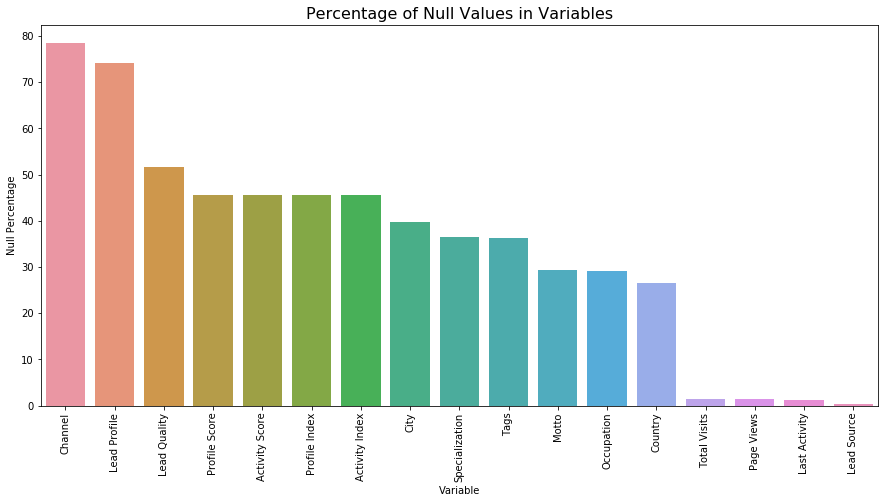

In [32]:
# Plot percentage of null values in each feature

plt.figure(figsize=(15,7))
ax = sns.barplot(data = stats, x = 'Variable', y = 'Null Percentage') 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Percentage of Null Values in Variables', fontsize = 16)
plt.show()

### 3.3. Dropping the Columns

<font color = 'green' size = '3'> __3.3.1. Dropping the columns with high percentage (greater than 45%) of null values.__ </font> 

__Channel (How did you hear about X Education):__ There are 2207 null values and 5043 records with value 'Select' which means that the customer has not selected any input. Out of 9240 records, 7250 records have missing value for this feature, which is more than 75%.

__Lead Profile:__ There are 2709 null values and 4146 records with value 'Select'. 6855 / 9240 = 74% null values. So this cannot be used in our model.

__Lead Quality:__ There were 4767 null values. 4767 / 9240 > 50% null values. Further the Lead Quality is assigned by the employee based on data and intuition. We cannot use it in our model, because we are trying to build the model to provide this intuition.

__Profile Index, Profile Score, Activity Index and Activity Score:__ Since the logic for imputing the values is not clear, these fields with higher percentage of null values (4128 / 9240 - approximately 45.5%) can be dropped. 

In [33]:
columns_to_drop = ['Lead Profile', 'Lead Quality', 'Channel',
                   'Profile Index', 'Activity Index', 
                   'Profile Score', 'Activity Score']

In [34]:
leads.drop(columns_to_drop, axis = 1, inplace = True)

---

<font color = 'green' size = '3'> __3.3.2. Dropping the binary variables with no variance.__ </font> 

In [35]:
binvar = ['Converted', 'Do Not Email', 'Do Not Call', 'Pay Cheque', 'Free Book',
          'Search', 'Magazine', 'Article', 'Forums', 'Newspaper', 'Digital Ads', 'Recommendations', 
          'Course Updates', 'SC Updates', 'DM Updates']

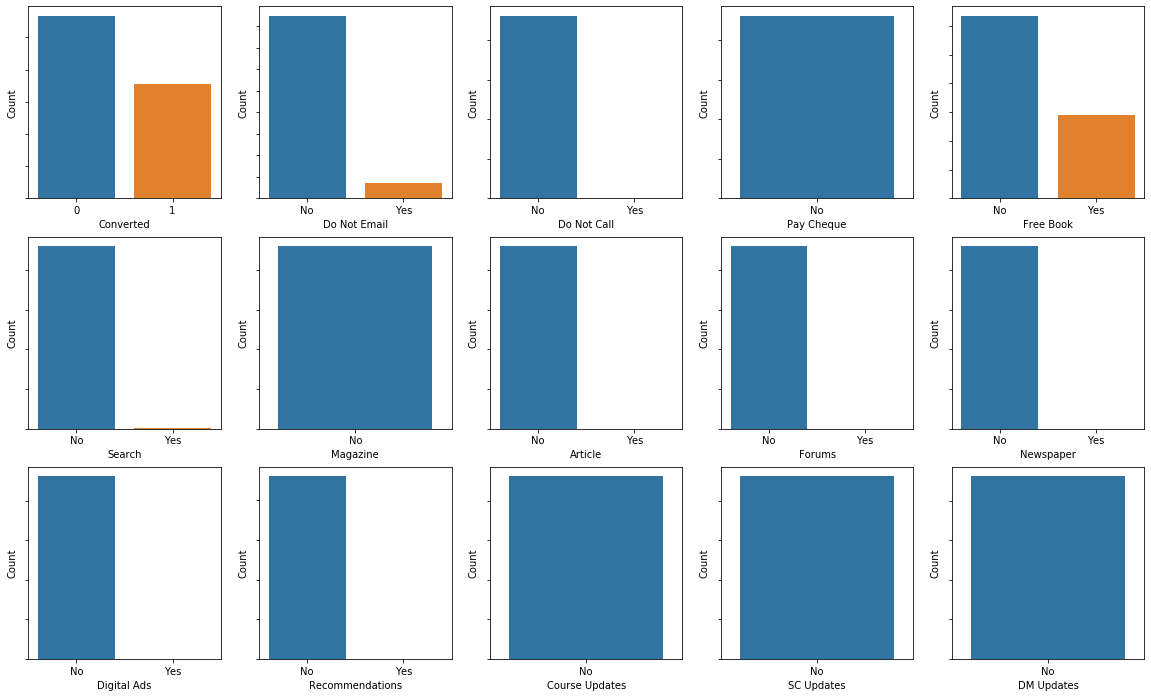

In [36]:
# Plot for Binary Variables

fig, axes = plt.subplots(3, 5, figsize=(20, 12))

i = 0; j = 0

for column in binvar:
    
    levels = leads[column].value_counts().reset_index()
    levels.rename(columns = {'index' : column, column : 'Count'}, inplace = True)
    ax = sns.barplot(data = levels, x = column, y = 'Count', ax = axes[i][j])
    ax.set(yticklabels=[]); # ax.set(xticklabels=[])
    
    j = j + 1
    if j == 5: i = i + 1; j = 0
    
plt.show()

<font color = 'blue'>__The columns other than Do Not Email and Free Book can be dropped.__ </font> 

In [37]:
columns_to_drop = ['Do Not Call', 'Pay Cheque', 'Course Updates', 'SC Updates', 'DM Updates',
                   'Search', 'Magazine', 'Article', 'Forums', 'Newspaper', 'Digital Ads', 'Recommendations']

leads.drop(columns_to_drop, axis = 1, inplace = True)

---

<font color = 'green' size = '3'> __3.3.3. Dropping the skewed categorical variables.__ </font> 

In [38]:
catvar = ['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity', 
          'Tags', 'Specialization', 'Occupation', 'Motto', 'Country', 'City']

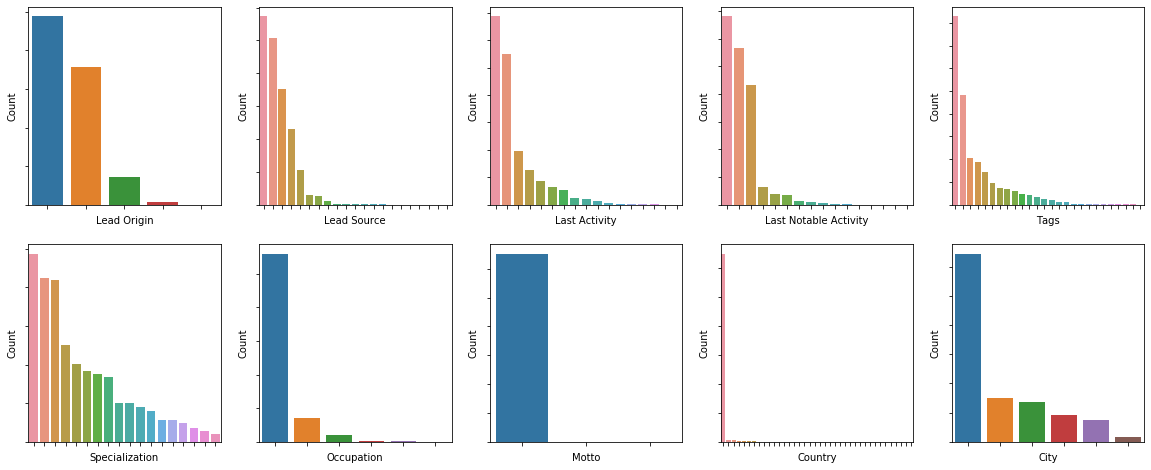

In [39]:
# Plot for Categorical Variables

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

i = 0; j = 0

for column in catvar:
    
    levels = leads[column].value_counts().reset_index()
    levels.rename(columns = {'index' : column, column : 'Count'}, inplace = True)
    ax = sns.barplot(data = levels, x = column, y = 'Count', ax = axes[i][j])
    ax.set(xticklabels=[]); ax.set(yticklabels=[])
    
    j = j + 1
    if j == 5: i = i + 1; j = 0
    
plt.show()

By studying the visualizations above, we see that the categorical variables __Country__ and __Motto__ are highly skewed. 

__Country:__ Out of 9240 records, 6492 records have Country = 'India' and 2461 records have null values. 37 other countries put together are 287 records. The data is skewed. __We can drop this column.__

__Motto (What matters most to you in choosing a course):__ Out of 9240 records, 6528 records have Motto = 'Better Career Prospects' and 2709 records have null values. Only 3 more records have a different values: Flexibility & Convenience (2 records), Other (1 record). __We can drop this column.__

__City:__ Out of 9240 records, 3669 (more than 30% are null values) and 3222 records have City = 'Mumbai'. The other 5 values are distributed among the remaining 2349 records, but instead of giving a specific city name it says Other Cities, Other Cities of Maharashtra, Other Metro Cities, Tier II Cities, Thane & Outskirts - which are as good as missing values. __We can drop this column.__ 

<font color = 'blue'> __The columns Country, City and Motto can be dropped.__ </font> 

In [40]:
leads.drop(['Country', 'City', 'Motto'], axis = 1, inplace = True)

---

<font color = 'green' size = '3'> __3.3.4. Other Columns to be Dropped.__ </font> 

In [41]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Total Visits', 'Time Spent', 'Page Views', 'Last Activity', 'Specialization', 'Occupation', 'Tags', 'Free Book', 'Last Notable Activity'], dtype='object')

<font color = 'blue'> __Prospect ID can be dropped as we have another unique identified - Lead Number.__ </font> And we will convert the Lead Number into the index for the data frame.

__Tags:__ Tags are free-form text that is updated based on what the lead said when the employee from the organization approached them. We are trying to build a model which will optimize the number of calls made so that the employees can contact the potential leads and the conversion rate can improve. So we cannot use this column for our model. <font color = 'blue'> __We can drop this column.__ </font>

In [42]:
leads.drop(['Prospect ID', 'Tags'], axis = 1, inplace = True)

In [43]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Total Visits', 'Time Spent', 'Page Views', 'Last Activity', 'Specialization', 'Occupation', 'Free Book', 'Last Notable Activity'], dtype='object')

In [44]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,Total Visits,Time Spent,Page Views,Last Activity,Specialization,Occupation,Free Book,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,Modified


---

### 3.4. Data Imputation

After dropping the columns that are not significant, we are left with certain columns that still have null values.

In [45]:
stats = pd.concat([pd.DataFrame(leads.dtypes), 
                   pd.DataFrame(leads.nunique()), 
                   pd.DataFrame(leads.isnull().sum()),
                   pd.DataFrame(round(100 * (leads.isnull().sum() / len(leads.index)), 2))], axis = 1).reset_index()

stats.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [46]:
stats.sort_values(by = 'Null Percentage', ascending = False)

,Variable,Data Type,Unique Values,Null Values,Null Percentage
9,Specialization,object,18,3380,36.58
10,Occupation,object,6,2690,29.11
5,Total Visits,float64,41,137,1.48
7,Page Views,float64,114,137,1.48
8,Last Activity,object,17,103,1.11
2,Lead Source,object,21,36,0.39
0,Lead Number,int64,9240,0,0.00
1,Lead Origin,object,5,0,0.00
3,Do Not Email,object,2,0,0.00
4,Converted,int64,2,0,0.00


There are broadly two ways to treat these null or missing values:

1. __Delete:__ Delete the rows having the missing values 
2. __Impute:__ Replace the missing values by another value, commonly the mean, median, mode etc. 

Note: We can also use statistical models such as k-NN, SVM etc. to predict and impute missing values.
   
In general, imputation makes assumptions about the missing values and replaces missing values by arbitrary numbers such as mean, median etc. It should be used only when you are reasonably confident about the assumptions. Otherwise, deletion is often safer and recommended. You may lose some data, but will not make any unreasonable assumptions.

|Variables|Description|Renamed To|Type|Null Values|Levels|
|:---|:---|:---|:---|---:|---:|
|Specialization|The industry domain in which the customer worked before.|Specialization|Categorical|3380|19|
|What is your current occupation|Current occupation of the customer.|Occupation|Categorical|2690|6|
|TotalVisits|The total number of visits made by the customer on the website.|Total Visits|Numeric|137||
|Page Views Per Visit|Average number of pages on the website viewed during the visits.|Page Views|Numeric|137||
|Last Activity|Last activity performed by the customer.|Last Activity|Categorical|103|17|
|Lead Source|The source of the lead.|Lead Source|Categorical|36|21|

In [47]:
# Function to print the statistics for the column

def colstats(column):
    stats = leads.pivot_table(values = 'Lead Number', index = column, columns = 'Converted', aggfunc = 'count').fillna(0)
    stats['Total'] = stats[0] + stats[1]
    stats["Conversion(%)"] = round(stats[1] / (stats['Total']), 2) * 100
    return print(stats.sort_values(ascending = False, by = 'Total'))

In [48]:
# Function to create a bar plot for the different levels in a categorical variable

def plot_catvar(column):
    plt.figure(figsize=(15,7))
    levels = leads[column].value_counts().reset_index()
    levels.rename(columns = {'index' : column, column : 'Count'}, inplace = True)
    ax = sns.barplot(data = levels, x = column, y = 'Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()
    return

---

<font color = 'green' size = '3'> __3.4.1. Specialization__ </font>

In [49]:
leads['Specialization'].isnull().sum()

3380

In [50]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

__There are 3380 null values. We will mark them as Unknown and later drop this when creating dummy variables.__

In [51]:
leads.loc[leads['Specialization'].isnull() == True, 'Specialization'] = 'Unknown'
leads.loc[leads['Specialization'] == 'E-COMMERCE', 'Specialization'] = 'E-Commerce'

In [52]:
colstats('Specialization')

Converted                             0    1  Total  Conversion(%)
Specialization                                                    
Unknown                            2411  969   3380           29.0
Finance Management                  540  436    976           45.0
Human Resource Management           460  388    848           46.0
Marketing Management                430  408    838           49.0
Operations Management               265  238    503           47.0
Business Administration             224  179    403           44.0
IT Projects Management              226  140    366           38.0
Supply Chain Management             198  151    349           43.0
Banking, Investment And Insurance   171  167    338           49.0
Media and Advertising               118   85    203           42.0
Travel and Tourism                  131   72    203           35.0
International Business              114   64    178           36.0
Healthcare Management                80   79    159           

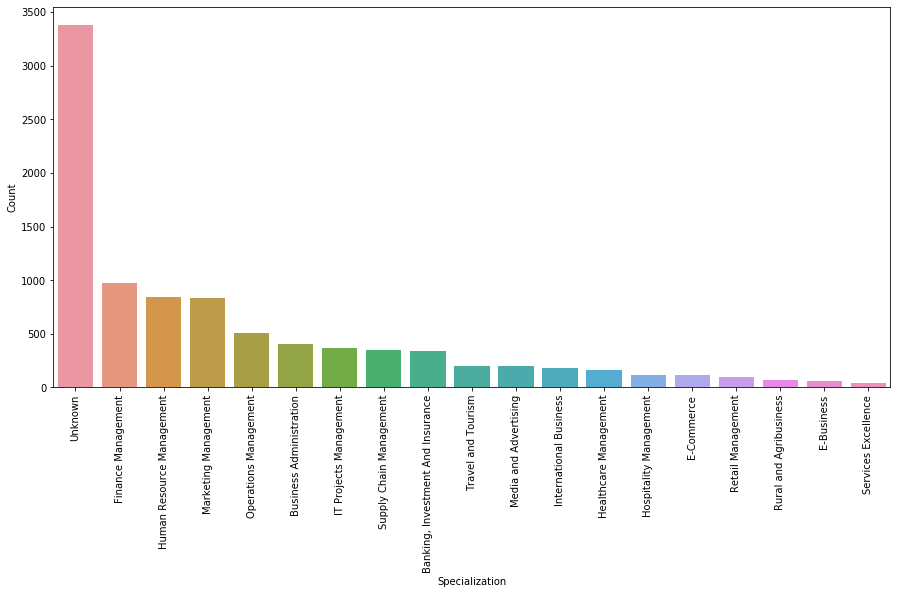

In [53]:
plot_catvar('Specialization')

---

<font color = 'green' size = '3'> __3.4.2. Occupation__ </font>

In [54]:
leads['Occupation'].isnull().sum()

2690

In [55]:
# There are 2690 null values; mark them as Unknown

leads.loc[leads['Occupation'].isnull() == True, 'Occupation'] = 'Unknown'

In [56]:
leads['Occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [57]:
# There are very few records of category Housewife and Businessman. We will mark them as Others.

leads.loc[leads['Occupation'].isin(['Housewife', 'Businessman', 'Other']), 'Occupation'] = 'Others'

In [58]:
colstats('Occupation')

Converted                0     1  Total  Conversion(%)
Occupation                                            
Unemployed            3159  2441   5600           44.0
Unknown               2320   370   2690           14.0
Working Professional    59   647    706           92.0
Student                132    78    210           37.0
Others                   9    25     34           74.0


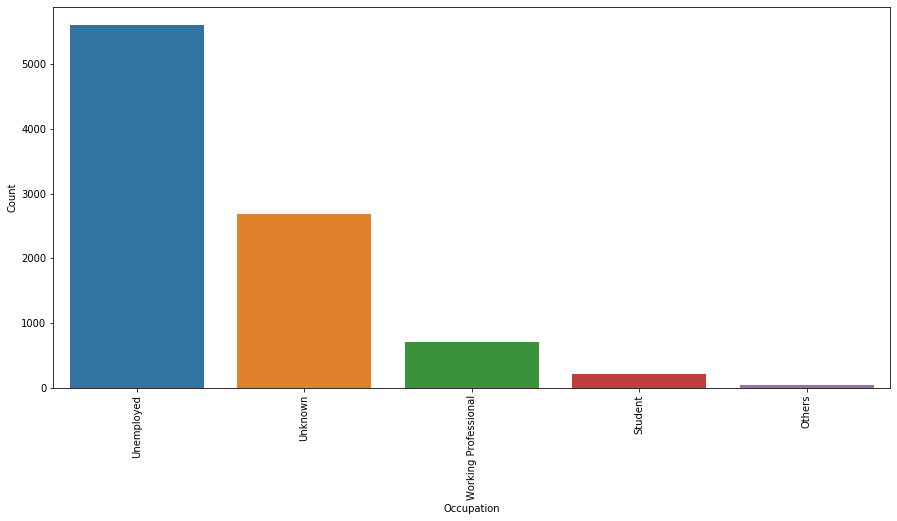

In [59]:
plot_catvar('Occupation')

---

<font color = 'green' size = '3'> __3.4.3. Lead Source__ </font>

In [60]:
leads['Lead Source'].isnull().sum()

36

In [61]:
# Impute null value with Others

leads.loc[leads['Lead Source'].isnull() == True, 'Lead Source'] = 'Others' 

In [62]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Others                 36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [63]:
# Change google to Google

leads.loc[leads['Lead Source'] == 'google', 'Lead Source'] = 'Google'

In [64]:
# For sources that are bringing less than 100 customers, we will mark it as Others

sources = ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', 
           'Welingak Website', 'Referral Sites']

leads.loc[~leads['Lead Source'].isin(sources), 'Lead Source'] = 'Others'

In [65]:
colstats('Lead Source')

Converted            0     1  Total  Conversion(%)
Lead Source                                       
Google            1726  1147   2873           40.0
Direct Traffic    1725   818   2543           32.0
Olark Chat        1307   448   1755           26.0
Organic Search     718   436   1154           38.0
Reference           44   490    534           92.0
Welingak Website     2   140    142           99.0
Referral Sites      94    31    125           25.0
Others              63    51    114           45.0


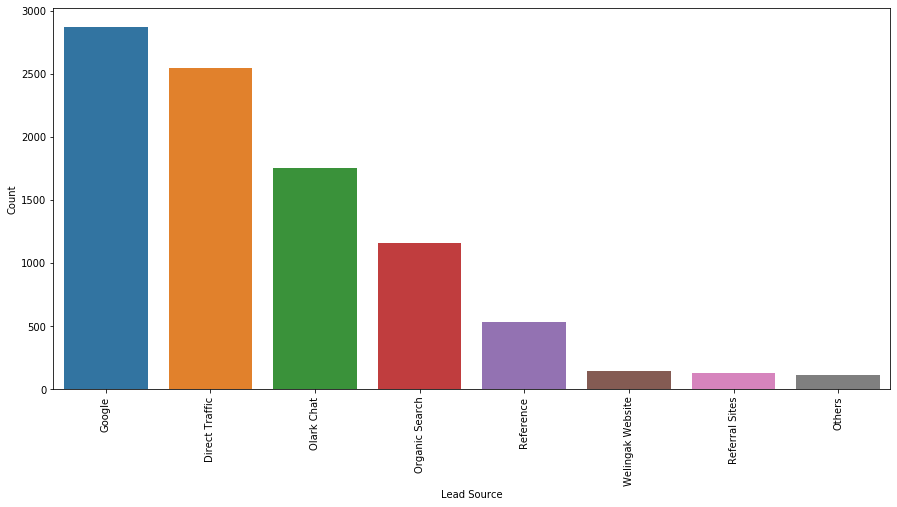

In [66]:
plot_catvar('Lead Source')

---

<font color = 'green' size = '3'> __3.4.4. Last Activity__ </font> 

There are __103__ nulll values in Last Activity. 

In [67]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [68]:
cols = ['Lead Source', 'Lead Origin', 'Total Visits', 'Time Spent', 'Page Views', 'Last Activity', 'Last Notable Activity']

leads[leads['Last Activity'].isnull() == True][cols].head(10)

,Lead Source,Lead Origin,Total Visits,Time Spent,Page Views,Last Activity,Last Notable Activity
77,Welingak Website,Lead Add Form,NaN,1096,NaN,NaN,Modified
79,Reference,Lead Add Form,NaN,705,NaN,NaN,Modified
81,Welingak Website,Lead Add Form,NaN,346,NaN,NaN,Modified
88,Reference,Lead Add Form,NaN,1007,NaN,NaN,Modified
120,Reference,Lead Add Form,NaN,1111,NaN,NaN,Modified
133,Reference,Lead Add Form,NaN,986,NaN,NaN,Modified
134,Welingak Website,Lead Add Form,NaN,889,NaN,NaN,Modified
177,Welingak Website,Lead Add Form,NaN,1240,NaN,NaN,Modified
179,Welingak Website,Lead Add Form,NaN,458,NaN,NaN,Modified
180,Welingak Website,Lead Add Form,NaN,1060,NaN,NaN,Modified


We noticed that for all these records the Last Notable Activity is marked as Modified. The Total Visits and Page Views are also null. But the time spent on the website is not null. These prospects were added through Lead Add Form or Lead Import. So we can safely assume that the last activity is that they visited a specific page in the website. So we will __update the null values with  Page Visited on Website__. 

In [69]:
# For null values impute with Page Visited on Website

leads.loc[leads['Last Activity'].isnull() == True, 'Last Activity'] = 'Page Visited on Website'

In [70]:
colstats('Last Activity')

Converted                          0       1   Total  Conversion(%)
Last Activity                                                      
Email Opened                  2184.0  1253.0  3437.0           36.0
SMS Sent                      1018.0  1727.0  2745.0           63.0
Olark Chat Conversation        889.0    84.0   973.0            9.0
Page Visited on Website        511.0   232.0   743.0           31.0
Converted to Lead              374.0    54.0   428.0           13.0
Email Bounced                  300.0    26.0   326.0            8.0
Email Link Clicked             194.0    73.0   267.0           27.0
Form Submitted on Website       88.0    28.0   116.0           24.0
Unreachable                     62.0    31.0    93.0           33.0
Unsubscribed                    45.0    16.0    61.0           26.0
Had a Phone Conversation         8.0    22.0    30.0           73.0
Approached upfront               0.0     9.0     9.0          100.0
View in browser link Clicked     5.0     1.0    

In [71]:
# Reduce number of levels by marking levels with less than 10 observations as Others

activity = ['Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 
            'Email Received', 'Email Marked Spam', 'Resubscribed to emails', 'Visited Booth in Tradeshow']

leads.loc[leads['Last Activity'].isin(activity), 'Last Activity'] = 'Others'

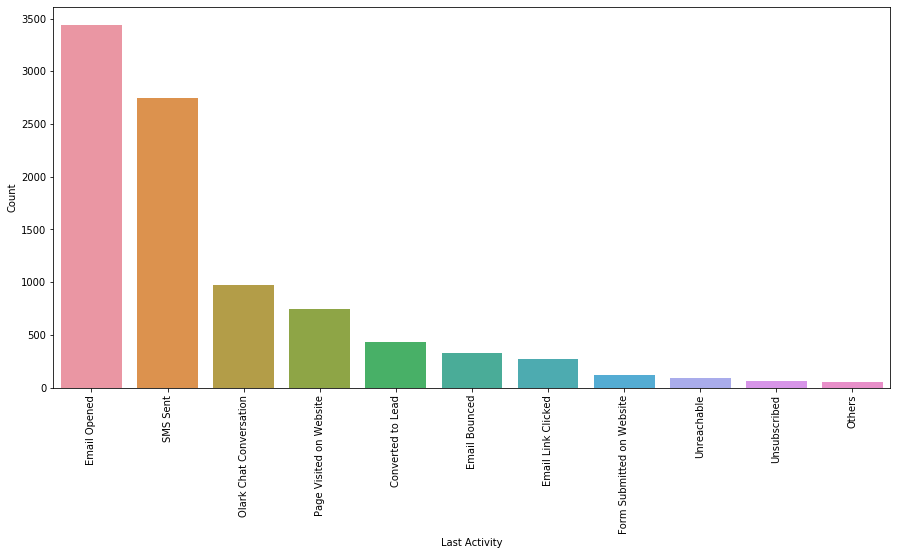

In [72]:
plot_catvar('Last Activity')

---

<font color = 'green' size = '3'> __3.4.5. Last Notable Activity__ </font> 

Here there are no null values. But let us check the levels and make it consistent with Last Activity where we have marked certain levels as Others.

In [73]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [74]:
# Reduce number of levels by marking levels with less than 10 observations as Others

activity = ['Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 
            'Email Received', 'Email Marked Spam', 'Resubscribed to emails', 'Visited Booth in Tradeshow']

leads.loc[leads['Last Notable Activity'].isin(activity), 'Last Notable Activity'] = 'Others'

In [75]:
colstats('Last Notable Activity')

Converted                       0       1   Total  Conversion(%)
Last Notable Activity                                           
Modified                   2624.0   783.0  3407.0           23.0
Email Opened               1783.0  1044.0  2827.0           37.0
SMS Sent                    664.0  1508.0  2172.0           69.0
Page Visited on Website     225.0    93.0   318.0           29.0
Olark Chat Conversation     158.0    25.0   183.0           14.0
Email Link Clicked          128.0    45.0   173.0           26.0
Email Bounced                51.0     9.0    60.0           15.0
Unsubscribed                 33.0    14.0    47.0           30.0
Unreachable                  10.0    22.0    32.0           69.0
Others                        2.0    18.0    20.0           90.0
Form Submitted on Website     1.0     0.0     1.0            0.0


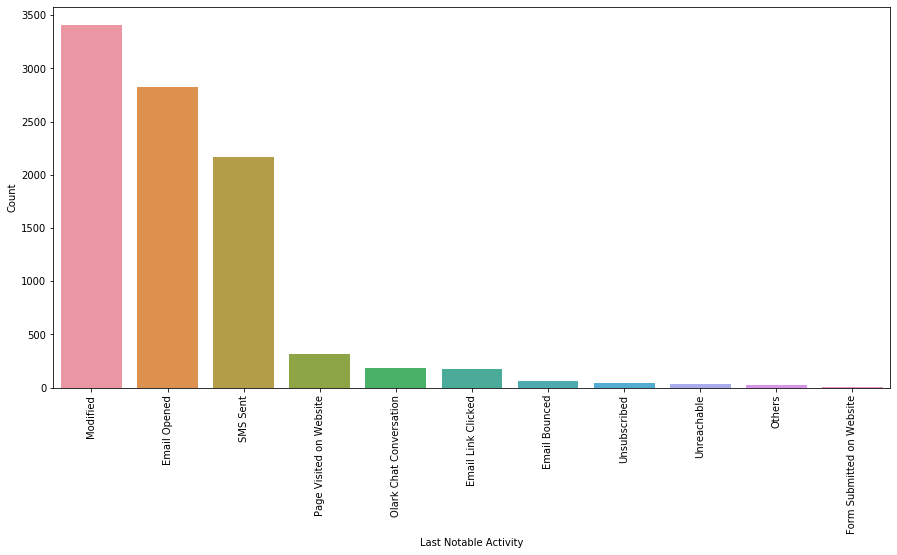

In [76]:
plot_catvar('Last Notable Activity')

---

<font color = 'green' size = '3'> __3.4.6. Lead Origin__ </font> 

Here there are no null values. But let us check the levels.

In [77]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [78]:
# There is only one record in Quick Add Form. Let us change it to Lead Add Form to reduce the number of levels.

leads.loc[leads['Lead Origin'] == 'Quick Add Form', 'Lead Origin'] = 'Lead Add Form'

In [79]:
colstats('Lead Origin')

Converted                   0     1  Total  Conversion(%)
Lead Origin                                              
Landing Page Submission  3118  1768   4886           36.0
API                      2465  1115   3580           31.0
Lead Add Form              54   665    719           92.0
Lead Import                42    13     55           24.0


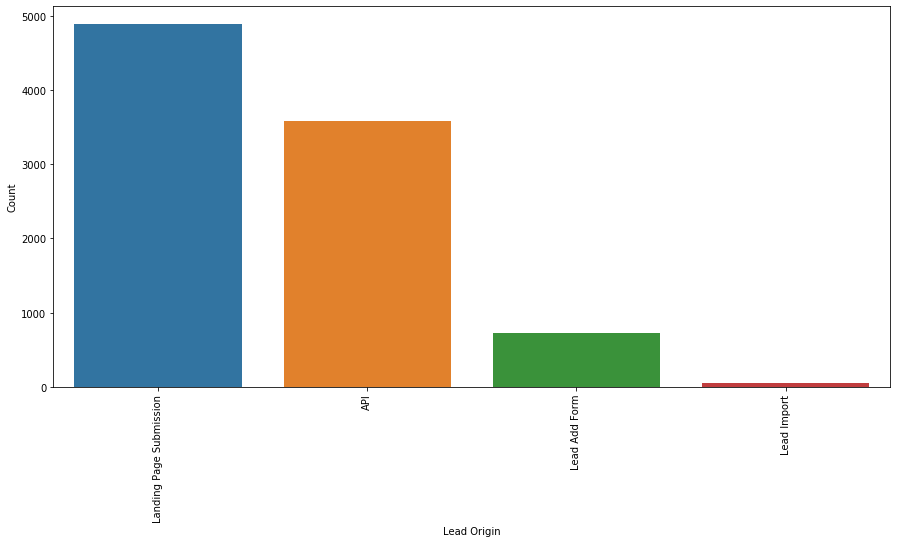

In [80]:
plot_catvar('Lead Origin')

---

<font color = 'green' size = '3'> __3.4.7. Total Visits & Page Views__ </font> 

There are 137 null values in both of these fields. 

In [81]:
leads[['Total Visits', 'Time Spent', 'Page Views']].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Visits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.0,251.0
Time Spent,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.0,2272.0
Page Views,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.0,55.0


(3.0, 0.0)

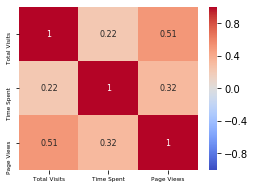

In [82]:
x = leads[['Total Visits', 'Time Spent', 'Page Views']]

correlation = x.corr()

f, ax = plt.subplots(figsize=(4, 3))

heatmap = sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, annot_kws = {"size": 8})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 'xx-small')
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 'xx-small')

bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

We also observed that these three fields are not highly correlated. If they are correlated, then probably we should have taken an approach where we need to see how we can predict one value with the others. Since they are not highly correlated we will __impute with Median Value__.

In [83]:
leads.loc[leads['Total Visits'].isnull() == True, 'Total Visits'] = leads['Total Visits'].median()

In [84]:
leads.loc[leads['Page Views'].isnull() == True, 'Page Views'] = leads['Page Views'].median()

In [85]:
leads[['Total Visits', 'Time Spent', 'Page Views']].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Visits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.0,251.0
Time Spent,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.0,2272.0
Page Views,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.0,55.0


(3.0, 0.0)

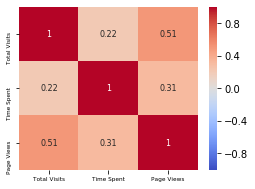

In [86]:
x = leads[['Total Visits', 'Time Spent', 'Page Views']]

correlation = x.corr()

f, ax = plt.subplots(figsize=(4, 3))

heatmap = sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, annot_kws = {"size": 8})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 'xx-small')
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 'xx-small')

bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

---

### 3.5. Dealing with Outliers in Data

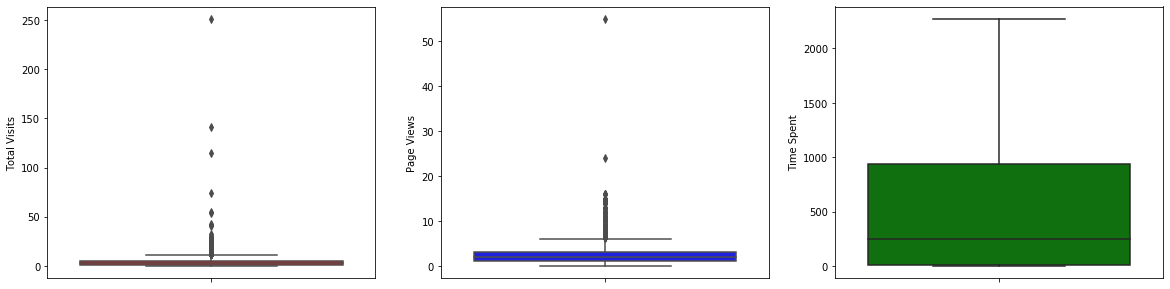

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data = leads, y = 'Total Visits', ax = axes[0], color = 'r')
sns.boxplot(data = leads, y = 'Page Views'  , ax = axes[1], color = 'b')
sns.boxplot(data = leads, y = 'Time Spent'  , ax = axes[2], color = 'g')

In [88]:
leads[['Total Visits', 'Time Spent', 'Page Views']].describe(percentiles=[.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Total Visits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.0,7.0,10.0,17.00,251.0
Time Spent,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.0,1380.0,1562.0,1840.61,2272.0
Page Views,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.0,5.0,6.0,9.00,55.0


There are few __outliers in Total Visits and Page Views__. But we will not remove them from the data.

In [89]:
leads[(leads['Total Visits'] > 10) | (leads['Time Spent'] > 1562) | (leads['Page Views'] > 6)].shape

(1039, 13)

---

## 4. Data Preparation

Now that we have cleaned up the data sufficiently, let us further proceed with data preparation for model building.

In [90]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Total Visits', 'Time Spent', 'Page Views', 'Last Activity', 'Specialization', 'Occupation', 'Free Book', 'Last Notable Activity'], dtype='object')

In [91]:
# We will set the Lead Number as the index

leads.set_index('Lead Number', inplace = True)

In [92]:
stats = pd.concat([pd.DataFrame(leads.dtypes), 
                   pd.DataFrame(leads.nunique()), 
                   pd.DataFrame(leads.isnull().sum()),
                   pd.DataFrame(round(100 * (leads.isnull().sum() / len(leads.index)), 2))], axis = 1).reset_index()

stats.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [93]:
stats

,Variable,Data Type,Unique Values,Null Values,Null Percentage
0,Lead Origin,object,4,0,0.0
1,Lead Source,object,8,0,0.0
2,Do Not Email,object,2,0,0.0
3,Converted,int64,2,0,0.0
4,Total Visits,float64,41,0,0.0
5,Time Spent,int64,1731,0,0.0
6,Page Views,float64,114,0,0.0
7,Last Activity,object,11,0,0.0
8,Specialization,object,19,0,0.0
9,Occupation,object,5,0,0.0


---

### 4.1. Dealing with Categorical Variables

The categorical variables are not numeric and cannot be used directly in the model; hence need some treatment. We have to create dummy or indicator variables. If the variable has n distinct values we will create n-1 indicator variables. Free Book has Yes or No values. So we can __map the values to 0 and 1__. 

If there are more than 2 levels in the categorical variable, we have two options: 
 
 - __perform label encoding:__ convert the labels into machine readable numeric form.
 - __create dummies:__ for a categorical variable with n levels, we need to create n-1 dummy variables. The nth variable is redundant and may create multicollinearity issues. In Python, we can use the pd.get_dummies() function to create dummy variables from the data frame.
 
Before creating dummies, to avoid so many columns getting created, we removed certain categorical columns that are skewed or not showing any variance. These columns need not be used for model building.

In [94]:
leads['Free Book'] = leads['Free Book'].map({'Yes' : 1,'No' : 0})       # Map the Yes or No values to 1 and 0
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes' : 1,'No' : 0}) # Map the Yes or No values to 1 and 0

In [95]:
leads = pd.get_dummies(leads)

In [96]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 64 columns):
Do Not Email                                        9240 non-null int64
Converted                                           9240 non-null int64
Total Visits                                        9240 non-null float64
Time Spent                                          9240 non-null int64
Page Views                                          9240 non-null float64
Free Book                                           9240 non-null int64
Lead Origin_API                                     9240 non-null uint8
Lead Origin_Landing Page Submission                 9240 non-null uint8
Lead Origin_Lead Add Form                           9240 non-null uint8
Lead Origin_Lead Import                             9240 non-null uint8
Lead Source_Direct Traffic                          9240 non-null uint8
Lead Source_Google                                  9240 non-null uint8
Lead Source_Olark 

For a categorical variable with n levels, n columns get created; but we only need n - 1. We will drop the following columns: 

In [97]:
leads.drop(['Lead Origin_Lead Import', 
            'Lead Source_Others', 
            'Last Activity_Others', 
            'Specialization_Unknown', 
            'Occupation_Unknown', 
            'Last Notable Activity_Others'], axis = 1, inplace = True)

---

### 4.2. Splitting Train and Test Data

Now that we have understood the data, addressed the data quality issues and had sufficiently dealt with the categorical variables, we are ready to build our first model. The first step is to split the data set into train data and test data. The algorithm learns from the train data to get deeper understanding on the target variable and uncovers patterns and relationships with other features in the dataset.

In [98]:
import sklearn as skl
from sklearn.model_selection import train_test_split

In [99]:
np.random.seed(0)

In [100]:
leads_train, leads_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 100)

In [101]:
leads_train.shape

(6468, 58)

In [102]:
leads_test.shape

(2772, 58)

### 4.3. Rescaling the Features 

Scaling doesn't impact our model. So we need to rescale the variables so that they have a comparable scale. Otherwise, the coefficients obtained while fitting the model might be very large or very small as compared to the other coefficients. There are two methods of scaling that we can go for:

 - __Standardization__ - (x - mu) / sigma - mu = 0 and sigma = 1
 - __Normalization__ - (x - xmin) / (xmax - xmin) - between -1 and 1
 
Here we will apply Standard Scaler.

Note: Scaling should be performed after removing the test set from the entire dataset.

In [103]:
features = ['Total Visits', 'Time Spent', 'Page Views']

In [104]:
leads_train[features].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Visits,6468.0,3.467687,5.283025,0.0,1.0,3.0,5.0,251.0
Time Spent,6468.0,483.875850,546.565663,0.0,12.0,246.0,926.5,2272.0
Page Views,6468.0,2.347738,2.162947,0.0,1.0,2.0,3.0,55.0


In [105]:
from sklearn.preprocessing import StandardScaler

# We apply rescaling on the following numeric variables

scaler = StandardScaler()

leads_train[features] = scaler.fit_transform(leads_train[features])

In [106]:
leads_train[features].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Visits,6468.0,-1.129448e-17,1.000077,-0.656434,-0.467133,-0.088533,0.290067,46.857900
Time Spent,6468.0,-1.609377e-16,1.000077,-0.885371,-0.863414,-0.435253,0.809891,3.271816
Page Views,6468.0,-2.013438e-16,1.000077,-1.085519,-0.623151,-0.160783,0.301585,24.344716


In [107]:
leads_train.shape

(6468, 58)

In [108]:
leads_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 641410 to 606685
Data columns (total 58 columns):
Do Not Email                                        6468 non-null int64
Converted                                           6468 non-null int64
Total Visits                                        6468 non-null float64
Time Spent                                          6468 non-null float64
Page Views                                          6468 non-null float64
Free Book                                           6468 non-null int64
Lead Origin_API                                     6468 non-null uint8
Lead Origin_Landing Page Submission                 6468 non-null uint8
Lead Origin_Lead Add Form                           6468 non-null uint8
Lead Source_Direct Traffic                          6468 non-null uint8
Lead Source_Google                                  6468 non-null uint8
Lead Source_Olark Chat                              6468 non-null uint8
Lead Source_Orga

---

### 4.4. Check for Multicollinearity

In [109]:
correlation = leads.corr()

In [110]:
mask = np.zeros_like(correlation, dtype = np.bool) # creates a boolean matrix of same dimensions as growth_correlation
mask[np.triu_indices_from(mask)] = True            # masks the indices in upper triangle with a True Value

(58.0, 0.0)

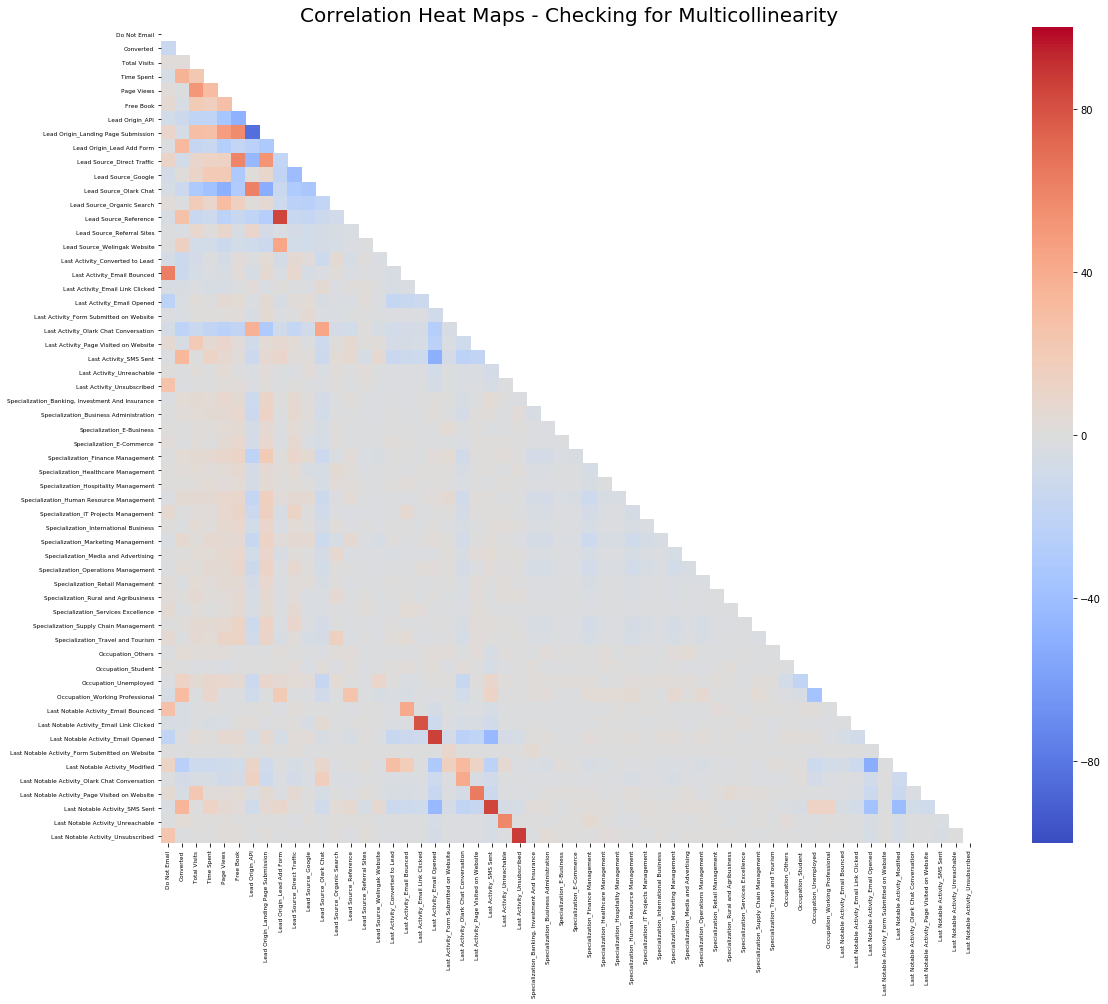

In [111]:
f, ax = plt.subplots(figsize=(20, 15))

heatmap = sns.heatmap(round(correlation * 100, 0), mask = mask, 
                      square = True, vmin = -100, vmax = 100,
                      cmap = 'coolwarm', annot = False)

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 'xx-small')
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 'xx-small')

# add the column names as labels
ax.set_yticklabels(correlation.columns, rotation = 0)
ax.set_xticklabels(correlation.columns, rotation = 90)

# add title to the plot
ax.set_title('Correlation Heat Maps - Checking for Multicollinearity', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

We see some high positive correlation between Last Notable Activity and Last Activity. Also we see high positive correlation in Lead Origin and Lead Source. Let us take a closer look.

(11.0, 0.0)

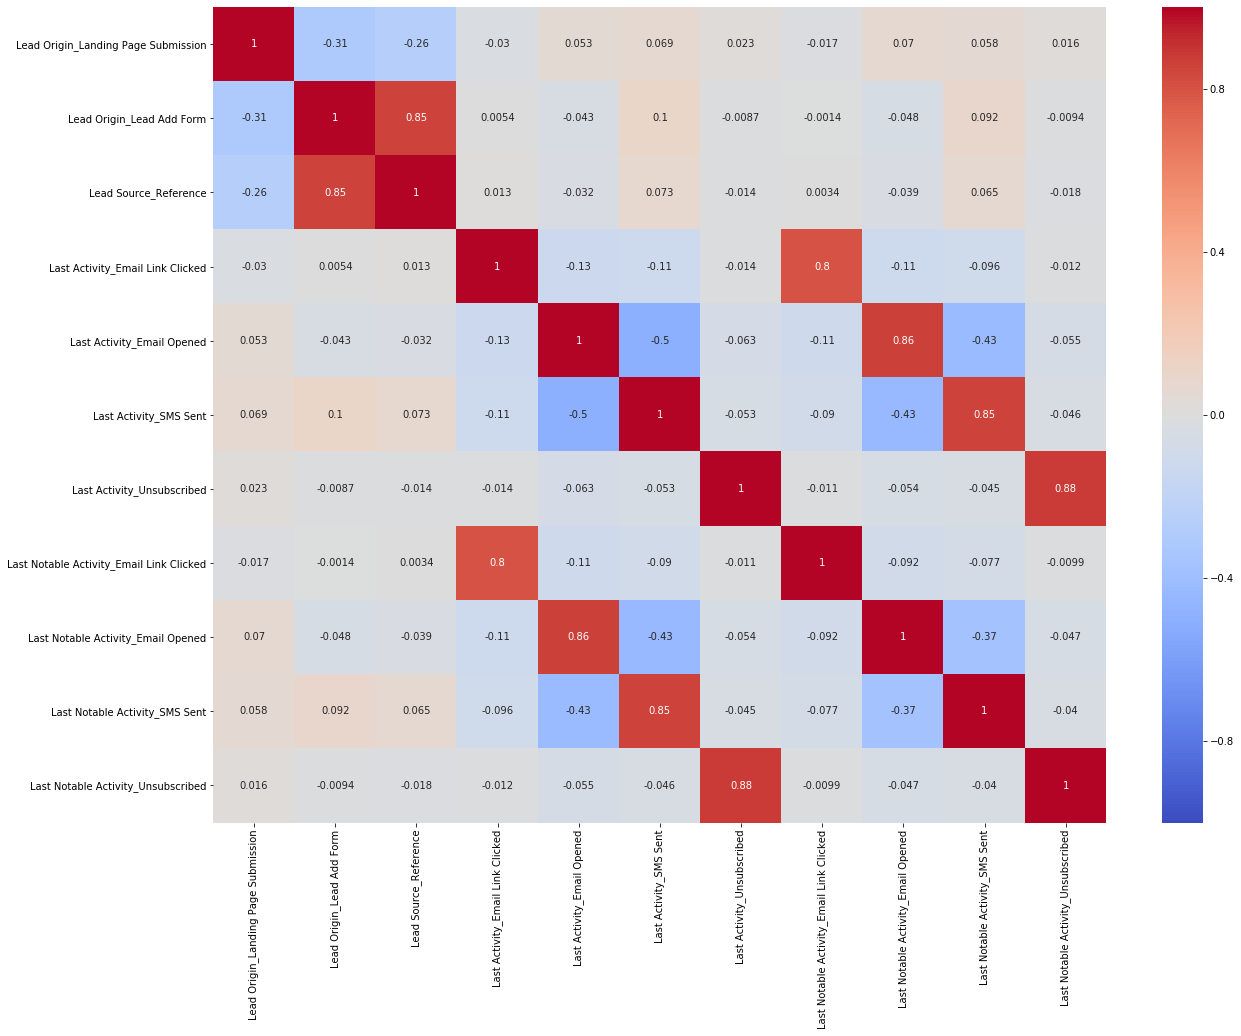

In [112]:
x = leads[['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Reference', 
          'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_SMS Sent', 
          'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 
          'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed']]

correlation = x.corr()

f, ax = plt.subplots(figsize=(20, 15))

heatmap = sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, annot_kws = {"size": 10})

ax.set_yticklabels(correlation.columns, rotation = 0)
ax.set_xticklabels(correlation.columns, rotation = 90)

bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

---

## 5. Building the Model

In [113]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Splitting the Train Data into X and y sets

In [114]:
y_train = leads_train.pop('Converted')
X_train = leads_train

### 5.1. Running the First Model

In [115]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

In [116]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.0
Date:                Mon, 20 Apr 2020   Deviance:                       5054.0
Time:                        20:16:56   Pearson chi2:                 6.92e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.1980      1.216      0.985      0.324      -1.185       3.581
Do Not Email                                        -1.1891      0.221     -5.375      0.000      -1.623      -0.755
Total Visits                                         0.1705      0.048      3.519      0.000       0.076       0.265
Time Spent                                           1.0812      0.041     26.311      0.000       1.001       1.162
Page Views                                          -0.1579      0.055     -2.856      0.004      -0.266      -0.050
Free Book                                           -0.1761      0.110     -1.597      0.110      -0.392       0.040
Lead Origin_API                                      1.0013      0.811      1.234      0.217      -0.589       2.591
Lead Origin_Landing Page Submission                  0.1334      0.811      0.165      0.869      -1.455       1.722
Lead Origin_Lead Add Form                            2.9604      0.714      4.145      0.000       1.560       4.360
Lead Source_Direct Traffic                          -1.0283      0.631     -1.630      0.103      -2.264       0.208
Lead Source_Google                                  -0.7499      0.627     -1.196      0.232      -1.978       0.479
Lead Source_Olark Chat                               0.1867      0.636      0.294      0.769      -1.059       1.433
Lead Source_Organic Search                          -0.8563      0.634     -1.351      0.177      -2.099       0.386
Lead Source_Reference                                0.1523      0.537      0.283      0.777      -0.901       1.206
Lead Source_Referral Sites                          -0.8969      0.701     -1.279      0.201      -2.271       0.477
Lead Source_Welingak Website                         2.4855      0.877      2.833      0.005       0.766       4.205
Last Activity_Converted to Lead                     -1.7159      0.619     -2.774      0.006      -2.928      -0.503
Last Activity_Email Bounced                         -1.9115      0.733     -2.609      0.009      -3.347      -0.476
Last Activity_Email Link Clicked                    -1.2112      0.699     -1.733      0.083      -2.581       0.159
Last Activity_Email Opened                          -0.6194      0.594     -1.042      0.297      -1.784       0.546
Last Activity_Form Submitted on Website             -1.3104      0.674     -1.943      0.052      -2.632       0.011
Last Activity_Olark Chat Conversation               -1.8845      0.610     -3.091      0.002      -3.079      -0.690
Last Activity_Page Visited on Website               -1.5012      0.615     -2.441      0.015      -2.706      -0.296
Last Activity_SMS Sent                   

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,284.62
5,Lead Origin_API,206.87
51,Last Notable Activity_Modified,152.15
49,Last Notable Activity_Email Opened,131.70
9,Lead Source_Google,124.43
8,Lead Source_Direct Traffic,107.44
18,Last Activity_Email Opened,106.45
54,Last Notable Activity_SMS Sent,104.73
22,Last Activity_SMS Sent,86.58
10,Lead Source_Olark Chat,76.24


While evaluating the models, we can drop the variables with highest p-value. A p-value > 0.05 is considered insignificant.  We can complement this information with the VIF (Virtual Inflation Factor). VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. A value < 5 is considered good fit. Sometimes VIF is infinity, which means that there exists a higher degree of collinearity between the variable and others. However, first we will apply RFE (recursive feature elimination) an inbuilt feature to reduce the number of variables from 70 to 10. 

---

### 5.2. Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Since in our dataset we have 70 features, selecting them manually, one by one, or taking all the features and eliminating them one by one is not feasible. So we will use RFE to choose 15 features that are significant.

In [118]:
# Running RFE with the output number of the variable equal to 10

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Visits', False, 38),
 ('Time Spent', True, 1),
 ('Page Views', False, 39),
 ('Free Book', False, 37),
 ('Lead Origin_API', False, 41),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', False, 43),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', False, 24),
 ('Last Activity_Unreachable', False, 5),
 ('Last Activity_U

In [121]:
col = X_train.columns[rfe.support_] # Features selected by RFE

In [122]:
col

Index(['Do Not Email', 'Time Spent', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Occupation_Others', 'Occupation_Student', 'Occupation_Working Professional', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'], dtype='object')

---

### 5.3. Manual Feature Elimination

We have selected 15 features that are significant, let us manually eliminate the features one by one, by observing the statistical values, p-value and / or VIF.

In [123]:
X_train_rfe = X_train[col]

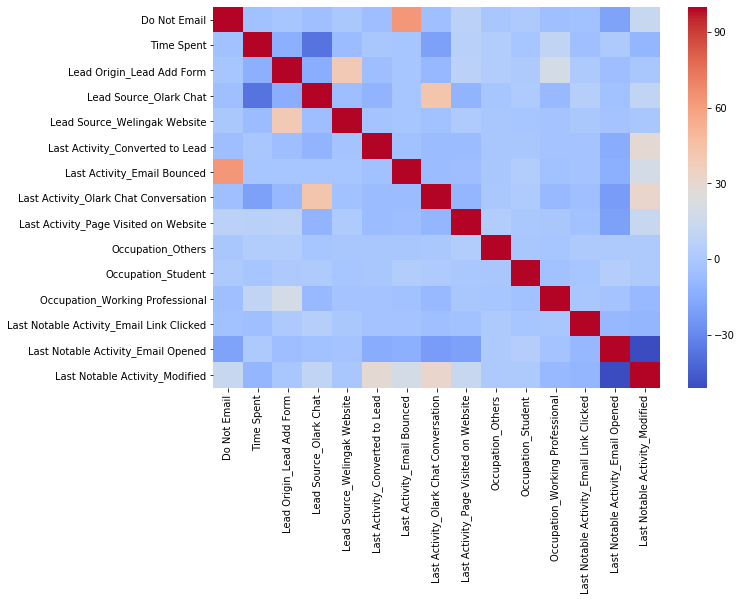

In [124]:
correlation = X_train_rfe.corr()

f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(round(correlation * 100, 0), annot = False, cmap = "coolwarm")
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

#### Model 1 with 15 Features

In [125]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.8
Date:                Mon, 20 Apr 2020   Deviance:                       5381.7
Time:                        20:17:03   Pearson chi2:                 7.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0303      0.065      0.463      0.643      -0.098       0.158
Do Not Email                                -1.2500      0.195     -6.401      0.000      -1.633      -0.867
Time Spent                                   1.0877      0.039     27.664      0.000       1.011       1.165
Lead Origin_Lead Add Form                    3.7539      0.190     19.750      0.000       3.381       4.126
Lead Source_Olark Chat                       1.0879      0.101     10.726      0.000       0.889       1.287
Lead Source_Welingak Website                 1.9698      0.742      2.654      0.008       0.515       3.425
Last Activity_Converted to Lead             -1.3008      0.226     -5.744      0.000      -1.745      -0.857
Last Activity_Email Bounced                 -1.3600      0.352     -3.860      0.000      -2.051      -0.669
Last Activity_Olark Chat Conversation       -1.7993      0.170    -10.564      0.000      -2.133      -1.466
Last Activity_Page Visited on Website       -1.3032      0.143     -9.098      0.000      -1.584      -1.022
Occupation_Others                            1.2814      0.532      2.407      0.016       0.238       2.325
Occupation_Student                           0.3771      0.234      1.609      0.108      -0.082       0.837
Occupation_Working Professional              2.8113      0.189     14.856      0.000       2.440       3.182
Last Notable Activity_Email Link Clicked    -1.8234      0.271     -6.729      0.000      -2.355      -1.292
Last Notable Activity_Email Opened          -1.2662      0.085    -14.946      0.000      -1.432      -1.100
Last Notable Activity_Modified              -1.3693      0.092    -14.851      0.000      -1.550      -1.189
============================================================================================================
"""

In [126]:
# Occupation_Student has a p-value = 0.108 (> 0.05) and hence insignificant.

X_train_rfe.drop('Occupation_Student', axis = 1, inplace = True)

In [127]:
col = col.drop('Occupation_Student')

#### Model 2 with 14 Features

In [128]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.1
Date:                Mon, 20 Apr 2020   Deviance:                       5384.2
Time:                        20:17:03   Pearson chi2:                 7.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0338      0.065      0.518      0.604      -0.094       0.162
Do Not Email                                -1.2511      0.195     -6.403      0.000      -1.634      -0.868
Time Spent                                   1.0876      0.039     27.667      0.000       1.011       1.165
Lead Origin_Lead Add Form                    3.7640      0.190     19.817      0.000       3.392       4.136
Lead Source_Olark Chat                       1.0920      0.101     10.768      0.000       0.893       1.291
Lead Source_Welingak Website                 1.9529      0.742      2.631      0.009       0.498       3.408
Last Activity_Converted to Lead             -1.3001      0.227     -5.739      0.000      -1.744      -0.856
Last Activity_Email Bounced                 -1.3556      0.353     -3.842      0.000      -2.047      -0.664
Last Activity_Olark Chat Conversation       -1.7954      0.170    -10.540      0.000      -2.129      -1.462
Last Activity_Page Visited on Website       -1.2981      0.143     -9.076      0.000      -1.578      -1.018
Occupation_Others                            1.2718      0.532      2.389      0.017       0.228       2.315
Occupation_Working Professional              2.8031      0.189     14.819      0.000       2.432       3.174
Last Notable Activity_Email Link Clicked    -1.8287      0.271     -6.750      0.000      -2.360      -1.298
Last Notable Activity_Email Opened          -1.2588      0.085    -14.894      0.000      -1.424      -1.093
Last Notable Activity_Modified              -1.3677      0.092    -14.840      0.000      -1.548      -1.187
============================================================================================================
"""

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.95
6,Last Activity_Email Bounced,1.84
0,Do Not Email,1.81
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.63
2,Lead Origin_Lead Add Form,1.42
4,Lead Source_Welingak Website,1.24
5,Last Activity_Converted to Lead,1.24
1,Time Spent,1.20
8,Last Activity_Page Visited on Website,1.18


The p-values are less than 0.05 and VIF < 5. Let us evaluate this model further.

---

## 6. Model Evaluation

In [130]:
model = logm3.fit()

### 6.1. Predicting with the Model

In [131]:
y_train_pred = model.predict(X_train_sm)

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)

In [133]:
df = pd.DataFrame({ 'Lead Number' : y_train.index,
                    'Converted'   : y_train.values, 
                    'Probability' : y_train_pred
                  })

In [134]:
df.head(5)

,Lead Number,Converted,Probability
0,641410,0,0.250527
1,597687,0,0.228161
2,626825,0,0.292171
3,587928,0,0.820332
4,622366,0,0.230629


In [135]:
df['Predicted'] = df.Probability.map(lambda x: 1 if x > 0.5 else 0)

In [136]:
df.head()

,Lead Number,Converted,Probability,Predicted
0,641410,0,0.250527,0
1,597687,0,0.228161,0
2,626825,0,0.292171,0
3,587928,0,0.820332,1
4,622366,0,0.230629,0


---

### 6.2. Compute the Metrics

In [137]:
from sklearn import metrics

In [138]:
confusion = metrics.confusion_matrix(df.Converted, df.Predicted)

In [139]:
print(confusion)

[[3554  448]
 [ 724 1742]]


In [140]:
print(metrics.accuracy_score(df.Converted, df.Predicted))

0.8188002473716759


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
print('Accuracy                  : ', (TP + TN) / (TP + TN + FP + FN))
print('Sensitivity               : ', TP / float(TP + FN))
print('Specificity               : ', TN / float(TN + FP))
print('False Positive Rate       : ', FP / float(TN + FP))
print('Positive Predictive Value : ', TP / float(TP + FP))
print('Negative Predictive Value : ', TN / float(TN + FN))

Accuracy                  :  0.8188002473716759
Sensitivity               :  0.7064071370640713
Specificity               :  0.888055972013993
False Positive Rate       :  0.111944027986007
Positive Predictive Value :  0.7954337899543379
Negative Predictive Value :  0.8307620383356709


---

### 6.3. Plotting an ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [143]:
# function to plot the ROC

def draw_roc(actual, probs):
    
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Plot')
    plt.legend(loc="lower right")
    plt.show()

    return None

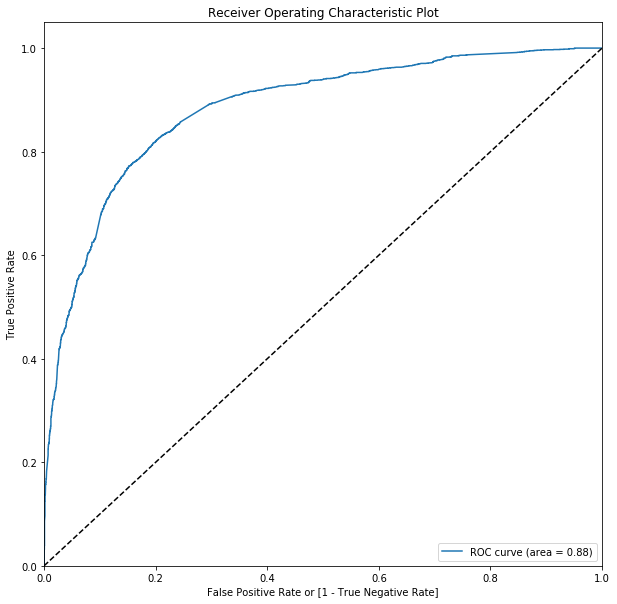

In [144]:
draw_roc(df.Converted, df.Probability)

---

### 6.4. Finding Optimal Cut Off Point

In [145]:
# Create columns with different probability cutoffs 

for i in range(1, 10): df[i / 10]= df.Probability.map(lambda x: 1 if x > (i / 10) else 0)

In [146]:
df.head(10)

,Lead Number,Converted,Probability,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,641410,0,0.250527,0,1,1,0,0,0,0,0,0,0
1,597687,0,0.228161,0,1,1,0,0,0,0,0,0,0
2,626825,0,0.292171,0,1,1,0,0,0,0,0,0,0
3,587928,0,0.820332,1,1,1,1,1,1,1,1,1,0
4,622366,0,0.230629,0,1,1,0,0,0,0,0,0,0
5,613574,1,0.992332,1,1,1,1,1,1,1,1,1,1
6,628456,0,0.117254,0,1,0,0,0,0,0,0,0,0
7,588051,1,0.992958,1,1,1,1,1,1,1,1,1,1
8,649586,0,0.121844,0,1,0,0,0,0,0,0,0,0
9,592598,1,0.898554,1,1,1,1,1,1,1,1,1,0


In [147]:
cutoff = pd.DataFrame(columns = ['Probability',
                                 'Accuracy',
                                 'Sensitivity',
                                 'Specificity', 
                                 'False Positive Rate', 
                                 'Positive Predictive Value', 
                                 'Negative Predictive Value'])

In [148]:
for num in range(1, 10):
    
    i = num / 10
    
    confusion = metrics.confusion_matrix(df.Converted, df[i])
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    probability = i
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    false_positive_rate = FP / (TN + FP)
    positive_pred_value = TP / (TP + FP)
    negative_pred_value = TN / (TN + FN)
    
    cutoff.loc[i] = [i, accuracy, sensitivity, specificity, false_positive_rate, positive_pred_value, negative_pred_value]
    

In [149]:
print(cutoff)

     Probability  Accuracy  Sensitivity  Specificity  False Positive Rate  Positive Predictive Value  Negative Predictive Value
0.1          0.1  0.560297     0.971614     0.306847             0.693153                   0.463443                   0.946071
0.2          0.2  0.741651     0.914031     0.635432             0.364568                   0.607056                   0.923049
0.3          0.3  0.801948     0.834955     0.781609             0.218391                   0.702012                   0.884866
0.4          0.4  0.818800     0.771695     0.847826             0.152174                   0.757564                   0.857685
0.5          0.5  0.818800     0.706407     0.888056             0.111944                   0.795434                   0.830762
0.6          0.6  0.797619     0.593674     0.923288             0.076712                   0.826652                   0.786672
0.7          0.7  0.782777     0.514193     0.948276             0.051724                   0.859661    

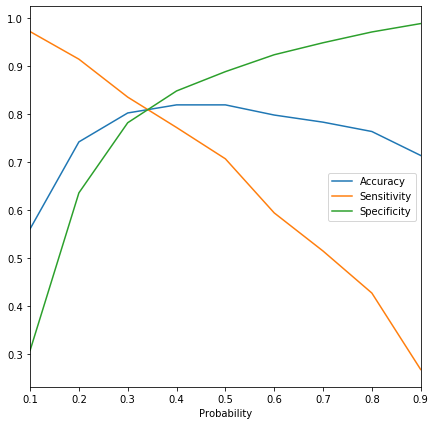

In [150]:
cutoff.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'], figsize=(7, 7))

__The lines intersect between 0.3 and 0.4.__

In [151]:
for i in range(30, 40): df[i / 100]= df.Probability.map(lambda x: 1 if x > (i / 100) else 0)

In [152]:
cutoff = pd.DataFrame(columns = ['Probability',
                                 'Accuracy',
                                 'Sensitivity',
                                 'Specificity', 
                                 'False Positive Rate', 
                                 'Positive Predictive Value', 
                                 'Negative Predictive Value'])

In [153]:
for num in range(30, 40):
    
    i = num / 100
    
    confusion = metrics.confusion_matrix(df.Converted, df[i])
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    probability = i
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    false_positive_rate = FP / (TN + FP)
    positive_pred_value = TP / (TP + FP)
    negative_pred_value = TN / (TN + FN)
    
    cutoff.loc[i] = [i, accuracy, sensitivity, specificity, false_positive_rate, positive_pred_value, negative_pred_value]
    

In [154]:
cutoff

,Probability,Accuracy,Sensitivity,Specificity,False Positive Rate,Positive Predictive Value,Negative Predictive Value
0.30,0.30,0.801948,0.834955,0.781609,0.218391,0.702012,0.884866
0.31,0.31,0.804731,0.829684,0.789355,0.210645,0.708204,0.882649
0.32,0.32,0.807050,0.822790,0.797351,0.202649,0.714437,0.879548
0.33,0.33,0.808751,0.817113,0.803598,0.196402,0.719386,0.877011
0.34,0.34,0.809524,0.808191,0.810345,0.189655,0.724201,0.872713
0.35,0.35,0.810606,0.801298,0.816342,0.183658,0.728882,0.869577
0.36,0.36,0.811379,0.796026,0.820840,0.179160,0.732463,0.867212
0.37,0.37,0.812925,0.788321,0.828086,0.171914,0.738602,0.863921
0.38,0.38,0.814626,0.782644,0.834333,0.165667,0.744312,0.861677
0.39,0.39,0.816945,0.777778,0.841079,0.158921,0.750979,0.859990


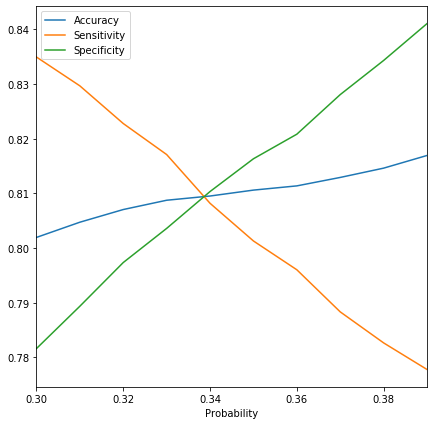

In [155]:
cutoff.plot.line(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'], figsize=(7, 7))

__The lines intersect at 0.34. Take this as cutoff and predict.__ 

---

### 6.5. Predicting with Optimal Cutoff

In [156]:
df['Predicted'] = df.Probability.map(lambda x: 1 if x > 0.34 else 0)

In [157]:
df = df[['Lead Number', 'Converted', 'Probability', 'Predicted']]

In [158]:
df

,Lead Number,Converted,Probability,Predicted
0,641410,0,0.250527,0
1,597687,0,0.228161,0
2,626825,0,0.292171,0
3,587928,0,0.820332,1
4,622366,0,0.230629,0
...,...,...,...,...
6463,656685,1,0.828659,1
6464,659710,1,0.987569,1
6465,588165,1,0.250527,0
6466,596447,0,0.042157,0


In [159]:
confusion = metrics.confusion_matrix(df.Converted, df.Predicted)

In [160]:
print(confusion)

[[3243  759]
 [ 473 1993]]


In [161]:
print(metrics.accuracy_score(df.Converted, df.Predicted))

0.8095238095238095


In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
print('Accuracy                  : ', (TP + TN) / (TP + TN + FP + FN))
print('Sensitivity               : ', TP / float(TP + FN))
print('Specificity               : ', TN / float(TN + FP))
print('False Positive Rate       : ', FP / float(TN + FP))
print('Positive Predictive Value : ', TP / float(TP + FP))
print('Negative Predictive Value : ', TN / float(TN + FN))

Accuracy                  :  0.8095238095238095
Sensitivity               :  0.8081914030819141
Specificity               :  0.8103448275862069
False Positive Rate       :  0.1896551724137931
Positive Predictive Value :  0.7242005813953488
Negative Predictive Value :  0.8727125941872982


---

### 6.6. Precision and Recall

In [164]:
print('Precision                 : ', TP / float(TP + FP))
print('Recall                    : ', TP / float(TP + FN))  # Same as Sensitivity

Precision                 :  0.7242005813953488
Recall                    :  0.8081914030819141


In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(df.Converted, df.Predicted)

0.7242005813953488

In [167]:
recall_score(df.Converted, df.Predicted)

0.8081914030819141

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
p, r, thresholds = precision_recall_curve(df.Converted, df.Probability)

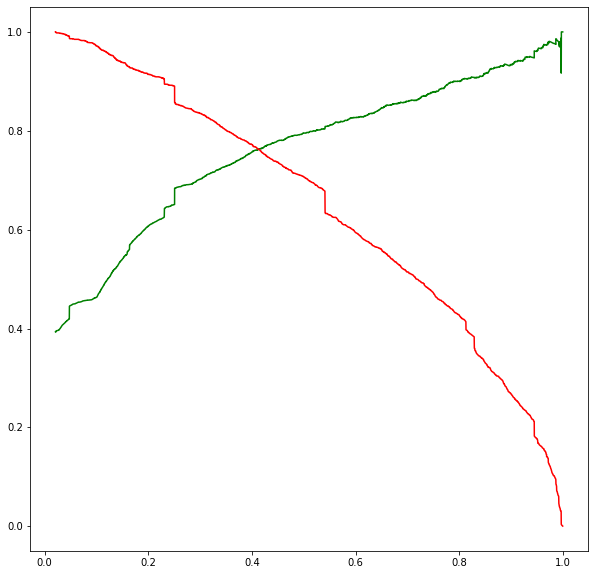

In [170]:
plt.figure(figsize=(10, 10))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

---

## 7. Predicting with Test Data

In [171]:
from sklearn.preprocessing import StandardScaler

# We apply rescaling on the following numeric variables

features = ['Total Visits', 'Time Spent', 'Page Views']

scaler = StandardScaler()

leads_test[features] = scaler.fit_transform(leads_test[features])

In [172]:
y_test = leads_test.pop('Converted')
X_test = leads_test[col]

In [173]:
X_test_sm = sm.add_constant(X_test)

In [174]:
y_test_pred = model.predict(X_test_sm)

In [175]:
y_test_pred = y_test_pred.values.reshape(-1)

In [176]:
df_test = pd.DataFrame({'Lead Number' : y_test.index,
                        'Converted'   : y_test.values, 
                        'Probability' : y_test_pred})

In [177]:
df_test['Predicted'] = df_test.Probability.map(lambda x: 1 if x > 0.34 else 0)

In [178]:
df_test.head()

,Lead Number,Converted,Probability,Predicted
0,619003,1,0.740501,1
1,636884,1,0.943649,1
2,590281,1,0.877999,1
3,579892,0,0.046665,0
4,617929,1,0.826262,1


In [179]:
metrics.accuracy_score(df_test.Converted, df_test.Predicted)

0.8174603174603174

In [180]:
confusion = metrics.confusion_matrix(df_test.Converted, df_test.Predicted)

In [181]:
print(confusion)

[[1383  294]
 [ 212  883]]


In [182]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [183]:
print('Accuracy                  : ', (TP + TN) / (TP + TN + FP + FN))
print('Sensitivity               : ', TP / float(TP + FN))
print('Specificity               : ', TN / float(TN + FP))
print('False Positive Rate       : ', FP / float(TN + FP))
print('Positive Predictive Value : ', TP / float(TP + FP))
print('Negative Predictive Value : ', TN / float(TN + FN))
print('Precision                 : ', TP / float(TP + FP))
print('Recall                    : ', TP / float(TP + FN))  # Same as Sensitivity

Accuracy                  :  0.8174603174603174
Sensitivity               :  0.806392694063927
Specificity               :  0.8246869409660107
False Positive Rate       :  0.17531305903398928
Positive Predictive Value :  0.7502124044180118
Negative Predictive Value :  0.8670846394984326
Precision                 :  0.7502124044180118
Recall                    :  0.806392694063927


---

## 8. Conclusions

### 8.1. Model Performance Summary

Here we summarize the model scores for the train data and test data.

|Parameter|Formula|Train Data|Test Data|
|:---|:---|---:|---:|
|Accuracy|(TP + TN) / (TP + TN + FP + FN))|80.95%|81.74%|
|Sensitivity|TP / (TP + FN)|80.82%|80.63%|
|Specificity|TN / (TN + FP)|81.03%|82.47%|
|False Positive Rate|FP / (TN + FP)|18.97%|17.53%|
|Positive Predictive Value|TP / (TP + FP)|72.42%|75.02%|
|Negative Predictive Value|TN / (TN + FN)|87.27%|86.71%|
|Precision|TP / (TP + FP)|72.42%|75.02%|
|Recall|TP / (TP + FN)|80.82%|80.64%|

---

### 8.2. Assigning a Lead Score

In [184]:
df_test['Lead Score'] = df_test['Probability'].apply(lambda x : round(x * 100))

In [185]:
df_test.head()

,Lead Number,Converted,Probability,Predicted,Lead Score
0,619003,1,0.740501,1,74
1,636884,1,0.943649,1,94
2,590281,1,0.877999,1,88
3,579892,0,0.046665,0,5
4,617929,1,0.826262,1,83


---

## 9. Subjective Questions

### 9.1. Computing Odds and Log Odds for better interpretation

Since likelihood of conversion as a probability is difficult to interpret, the logistic regression equation can be converted into a more suitable form for interpretaion by linearising it. For this we can compute the log odds and odds.

log odds = beta0 + beta1 x1 + beta2 x2 + ....

Our equation is: __0.0338 + (Lead Origin_Lead Add Form * 3.764) + (Occupation_Working Professional * 2.8031) + (Lead Source_Welingak Website * 1.9529) + (Occupation_Others * 1.2718) + (Lead Source_Olark Chat * 1.092) + (Time Spent * 1.0876) - (Do Not Email * 1.2511) - (Last Notable Activity_Email Opened * 1.2588) - (Last Activity_Page Visited on Website * 1.2981) - (Last Activity_Converted to Lead * 1.3001) - (Last Activity_Email Bounced * 1.3556) - (Last Notable Activity_Modified * 1.3677) - (Last Activity_Olark Chat Conversation * 1.7954) - (Last Notable Activity_Email Link Clicked * 1.8287)__

In [186]:
leads_test['Log Odds'] = (0.0338 
+ (leads_test['Lead Origin_Lead Add Form'] * 3.764) 
+ (leads_test['Occupation_Working Professional'] * 2.8031) 
+ (leads_test['Lead Source_Welingak Website'] * 1.9529) 
+ (leads_test['Occupation_Others'] * 1.2718) 
+ (leads_test['Lead Source_Olark Chat'] * 1.092) 
+ (leads_test['Time Spent'] * 1.0876) 
- (leads_test['Do Not Email'] * 1.2511) 
- (leads_test['Last Notable Activity_Email Opened'] * 1.2588) 
- (leads_test['Last Activity_Page Visited on Website'] * 1.2981) 
- (leads_test['Last Activity_Converted to Lead'] * 1.3001) 
- (leads_test['Last Activity_Email Bounced'] * 1.3556) 
- (leads_test['Last Notable Activity_Modified'] * 1.3677) 
- (leads_test['Last Activity_Olark Chat Conversation'] * 1.7954) 
- (leads_test['Last Notable Activity_Email Link Clicked'] * 1.8287))

In [187]:
leads_test['Odds'] = np.exp(leads_test['Log Odds'])

In [188]:
leads_test.shape

(2772, 59)

In [189]:
leads_odds = leads_test[['Odds', 'Log Odds', 
                         'Lead Origin_Lead Add Form', 
                         'Occupation_Working Professional', 
                         'Lead Source_Welingak Website',
                         'Occupation_Others',
                         'Lead Source_Olark Chat',
                         'Time Spent',
                         'Do Not Email',
                         'Last Notable Activity_Email Opened',
                         'Last Activity_Page Visited on Website',
                         'Last Activity_Converted to Lead',
                         'Last Activity_Email Bounced',
                         'Last Notable Activity_Modified',
                         'Last Activity_Olark Chat Conversation',
                         'Last Notable Activity_Email Link Clicked']]

__A linear increase in log odds value will have a multiplicative effect on the odds of conversion.__

In [190]:
leads_odds.reset_index()

,Lead Number,Odds,Log Odds,Lead Origin_Lead Add Form,Occupation_Working Professional,Lead Source_Welingak Website,Occupation_Others,Lead Source_Olark Chat,Time Spent,Do Not Email,Last Notable Activity_Email Opened,Last Activity_Page Visited on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Notable Activity_Modified,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked
0,619003,2.853568,1.048570,0,0,0,0,0,0.933036,0,0,0,0,0,0,0,0
1,636884,16.744626,2.818077,1,0,0,0,0,-0.900812,0,0,0,0,0,0,0,0
2,590281,7.196337,1.973572,0,1,0,0,0,-0.793792,0,0,0,0,0,0,0,0
3,579892,0.048947,-3.017023,0,0,0,0,1,-0.900812,0,0,0,0,0,1,1,0
4,617929,4.755384,1.559277,1,0,0,0,0,-0.900812,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,583730,0.187887,-1.671913,0,0,0,0,0,-0.374782,0,0,1,0,0,0,0,0
2768,639134,16.744626,2.818077,1,0,0,0,0,-0.900812,0,0,0,0,0,0,0,0
2769,595041,0.328663,-1.112723,0,0,0,0,1,-0.900812,0,1,0,0,0,0,0,0
2770,608916,0.184414,-1.690573,0,0,0,0,0,2.015932,1,0,1,0,0,1,0,0


In [191]:
final = pd.merge(df_test, leads_odds, how = 'inner', on = 'Lead Number')

In [192]:
final.sort_values(by = 'Log Odds', ascending = False).head(10)

,Lead Number,Converted,Probability,Predicted,Lead Score,Odds,Log Odds,Lead Origin_Lead Add Form,Occupation_Working Professional,Lead Source_Welingak Website,Occupation_Others,Lead Source_Olark Chat,Time Spent,Do Not Email,Last Notable Activity_Email Opened,Last Activity_Page Visited on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Notable Activity_Modified,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked
1091,651812,1,0.999401,1,100,1669.636423,7.420361,1,1,0,0,0,1.947004,0,0,1,0,0,0,0,0
835,615524,1,0.998614,1,100,720.504511,6.579952,1,1,0,0,0,1.174284,0,0,1,0,0,0,0,0
546,627106,1,0.998136,1,100,535.648339,6.283478,1,1,0,0,0,2.159229,0,0,1,0,0,1,0,0
745,600952,1,0.998035,1,100,507.863379,6.230212,1,1,0,0,0,2.110254,0,0,1,0,0,1,0,0
605,594369,1,0.998000,1,100,499.124955,6.212856,1,1,0,0,0,0.800622,0,1,0,0,0,0,0,0
1026,606508,1,0.997646,1,100,423.842050,6.049361,0,1,0,0,0,2.953715,0,0,0,0,0,0,0,0
953,630010,1,0.997498,1,100,398.698026,5.988204,0,1,0,0,0,2.897485,0,0,0,0,0,0,0,0
224,587853,1,0.997277,1,100,366.265102,5.903357,1,0,1,0,0,1.333907,0,0,1,0,0,0,0,0
2405,604411,1,0.996624,1,100,295.212255,5.687695,1,1,0,0,0,1.611433,0,0,1,0,0,1,0,0
2188,614107,1,0.996393,1,100,276.214394,5.621177,1,1,0,0,0,-0.900812,0,0,0,0,0,0,0,0


__We can see that the prediction is true as the odds increase.__ With this we can interpret the model to answer the subjective questions.


---

### 9.2. Answering the Subjective Questions

#### Question 1

__Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?__

The variables that contribute most towards the probability of lead getting converted are the ones with the highest coefficients (beta value). 
 - Lead Origin_Lead Add Form (3.764) 
 - Occupation_Working Professional (2.8031) 
 - Lead Source_Welingak Website (1.9529)
 
#### Question 2
 
__What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?__

- __Occupation:__ Focus on working professionals, business men, house wife (than focusing on unemployed and students).
- __Lead Source:__ Focus on leads sourced from Welingak Website and Olark Chats
- __Lead Origin:__ Focus on leads received from the lead add form in the website.

#### Question 3

__Scenario:__ X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. 

__Suggest a good strategy they should employ at this stage.__

It is better to focus on a wider set of audience. We can keep the odds cutoff lower.


In [193]:
final[['Probability', 'Lead Score', 'Odds', 'Log Odds']].describe(percentiles=[.25, .5, .75, .90, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Probability,2772.0,0.374516,0.314452,0.005539,0.116675,0.247388,0.612786,0.895202,0.971034,0.996176,0.999401
Lead Score,2772.0,37.502525,31.435309,1.000000,12.000000,25.000000,61.000000,89.900000,97.000000,100.000000,100.000000
Odds,2772.0,9.097833,50.388689,0.005569,0.132080,0.328663,1.582555,8.542459,33.521176,260.546726,1669.636423
Log Odds,2772.0,-0.669922,2.111038,-5.190463,-2.024351,-1.112723,0.459040,2.145048,3.512177,5.562756,7.420361


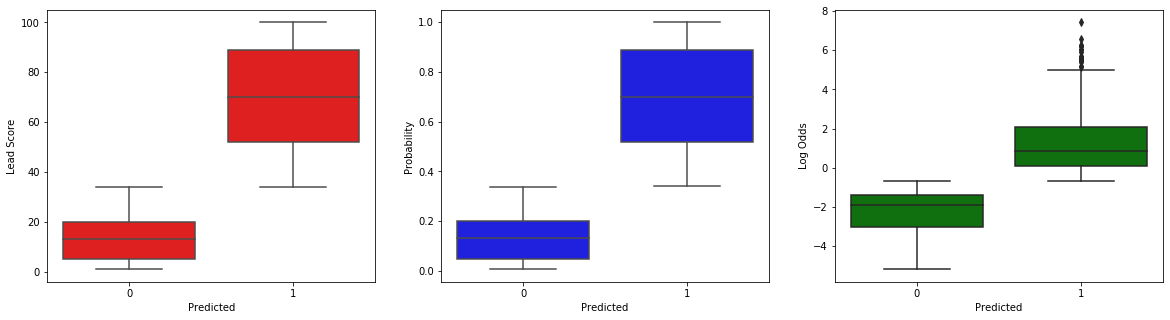

In [194]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(data = final, y = 'Lead Score' , x = 'Predicted', ax = axes[0], color = 'r')
sns.boxplot(data = final, y = 'Probability', x = 'Predicted', ax = axes[1], color = 'b')
sns.boxplot(data = final, y = 'Log Odds'   , x = 'Predicted', ax = axes[2], color = 'g')

Since there are additional resources (10 interns) we can take the leads above the 50th percentile (note: below 50th percentile, the odds of conversion i.e. how likely they are to get converted) becomes less than 0). The percentile cut off can be thus adjusted to ensure that the interns are engaged as well as the conversion rate is higher.

#### Question 4

__Scenario:__ Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. 

__Suggest a strategy they should employ at this stage.__

Here, since there is a resource crunch, we need to focus on the leads with higher odds of conversion.

In [195]:
final[['Probability', 'Lead Score', 'Odds', 'Log Odds']].describe(percentiles=[.6, .7, .8, .9, .95, .99]).T

,count,mean,std,min,50%,60%,70%,80%,90%,95%,99%,max
Probability,2772.0,0.374516,0.314452,0.005539,0.247388,0.381989,0.536483,0.732425,0.895202,0.971034,0.996176,0.999401
Lead Score,2772.0,37.502525,31.435309,1.000000,25.000000,38.000000,54.000000,73.000000,89.900000,97.000000,100.000000,100.000000
Odds,2772.0,9.097833,50.388689,0.005569,0.328663,0.618112,1.157286,2.737330,8.542459,33.521176,260.546726,1669.636423
Log Odds,2772.0,-0.669922,2.111038,-5.190463,-1.112723,-0.481089,0.146077,1.006983,2.145048,3.512177,5.562756,7.420361


Since there are limitation of resources we can take the leads above the 80th percentile (note: the odds of conversion here is more than 2 times than the other leads) or making calls. The lead score for these people is 73 and above. The percentile cut off can be thus adjusted to ensure that the phone calls are made only if it is exteremely necessary.